In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer

In [2]:
df = pd.read_csv("updated_pollution_dataset.csv")

In [3]:
df.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good

In [4]:
df.shape

(5000, 10)

In [5]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [7]:
df['Air Quality'].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

In [8]:
X = df.drop(columns='Air Quality')
y = df['Air Quality']
X.shape , y.shape

((5000, 9), (5000,))

In [9]:
def All_plot(X):
    col = X.columns
    for column in col:
        if np.issubdtype(X[column].dtype, np.number):  # Check if the column is numeric
            fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # 3 plots in a row
            
            skewness = X[column].skew()
            
            # Determine skewness type
            if skewness > 0:
                skew_type = "Positive Skewness"
            elif skewness < 0:
                skew_type = "Negative Skewness"
            else:
                skew_type = "Approximately Symmetrical"
            
            print(f"{column}: Skewness = {skewness:.2f} ({skew_type})")
            
            # KDE plot
            sns.kdeplot(X[column].dropna(), fill=True, color='blue', alpha=0.5, ax=axes[0])
            axes[0].set_title(f"KDE Plot for {column}\n(Skewness: {skewness:.2f}) ({skew_type})", fontsize=12)
            axes[0].set_xlabel(column)
            axes[0].set_ylabel('Density')
            axes[0].grid(alpha=0.3)
        
            # Q-Q plot
            stats.probplot(X[column].dropna(), dist="norm", plot=axes[1])
            axes[1].set_title(f"Q-Q Plot for {column}", fontsize=12)
            
            # Boxplot
            sns.boxplot(x=X[column], ax=axes[2])
            axes[2].set_title(f"Boxplot for {column}", fontsize=12)
            axes[2].set_xlabel(column)
            
            plt.tight_layout()
            plt.show()

Temperature: Skewness = 0.75 (Positive Skewness)


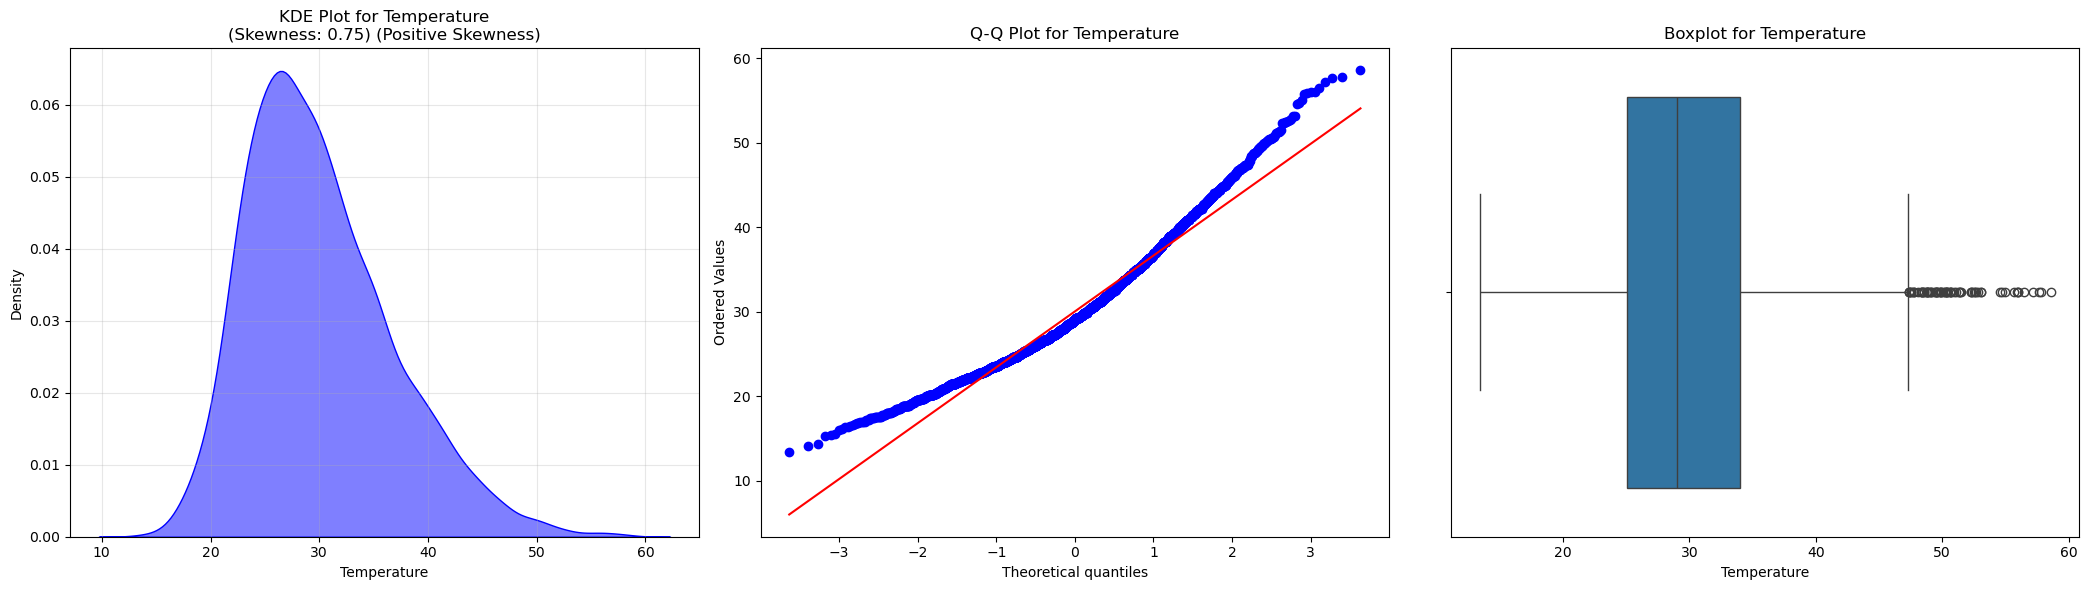

Humidity: Skewness = 0.28 (Positive Skewness)


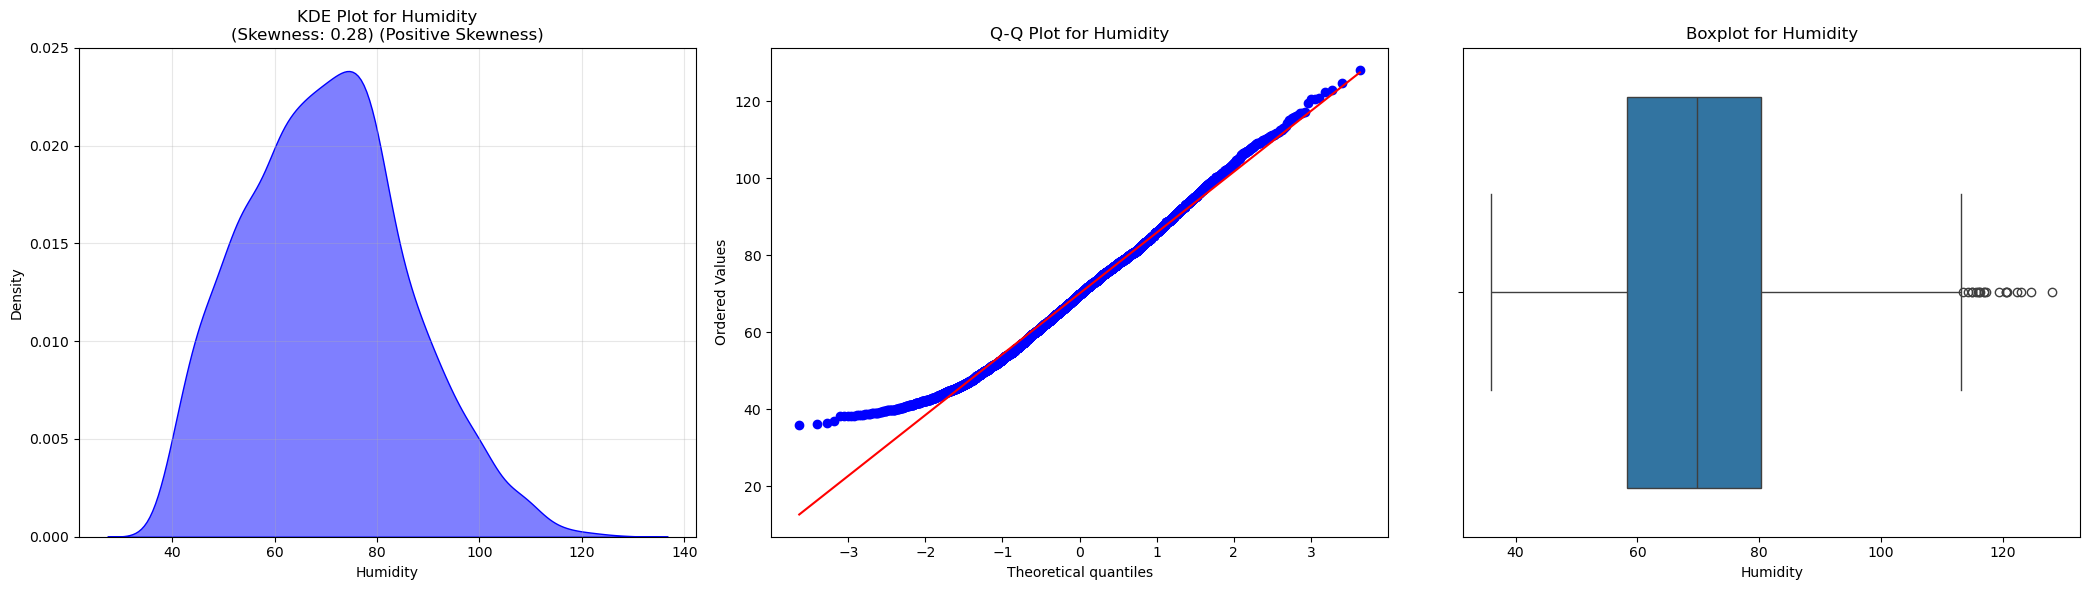

PM2.5: Skewness = 2.89 (Positive Skewness)


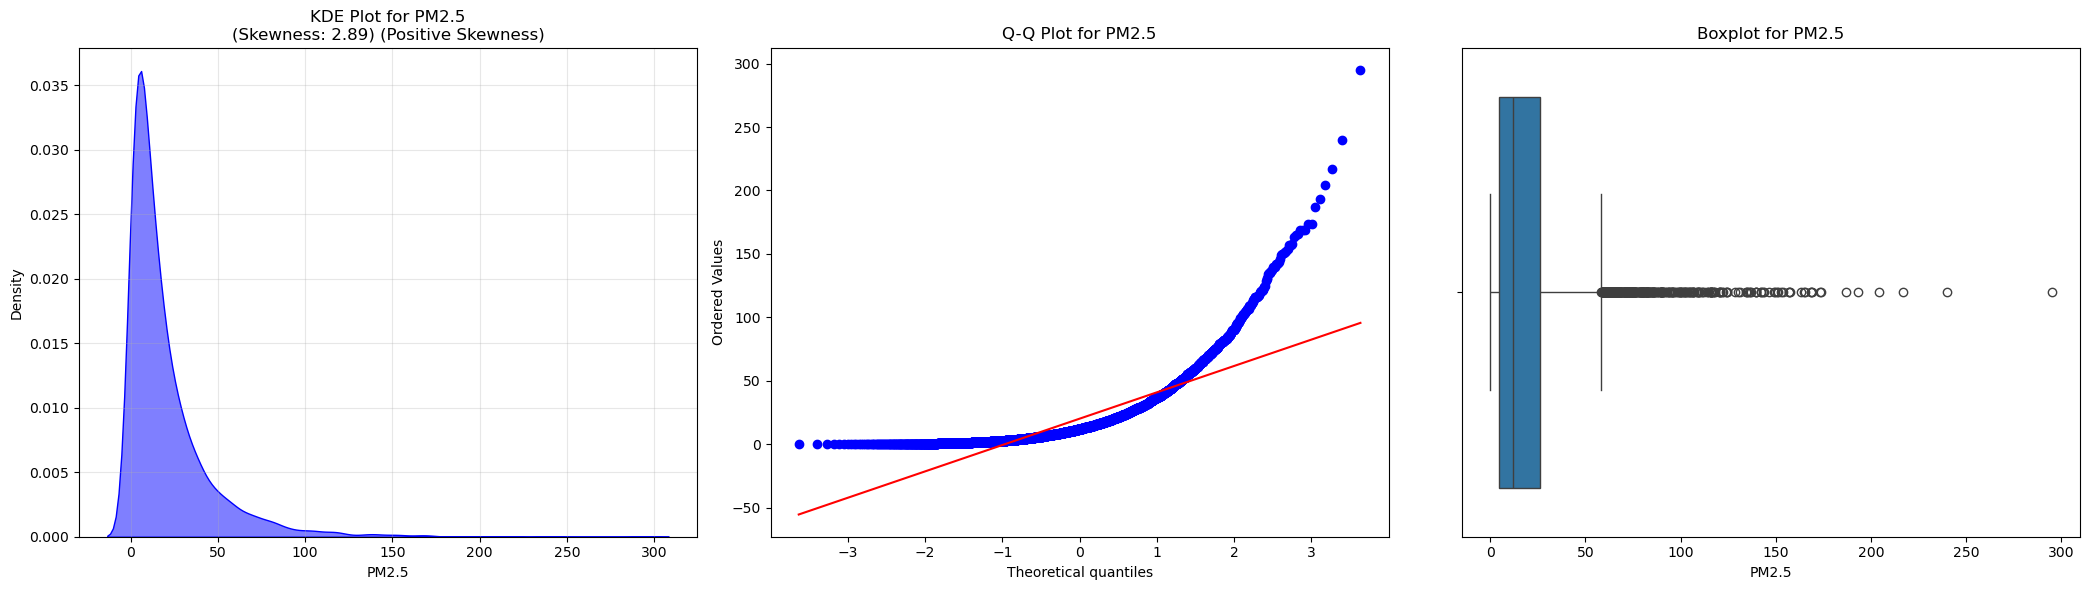

PM10: Skewness = 2.53 (Positive Skewness)


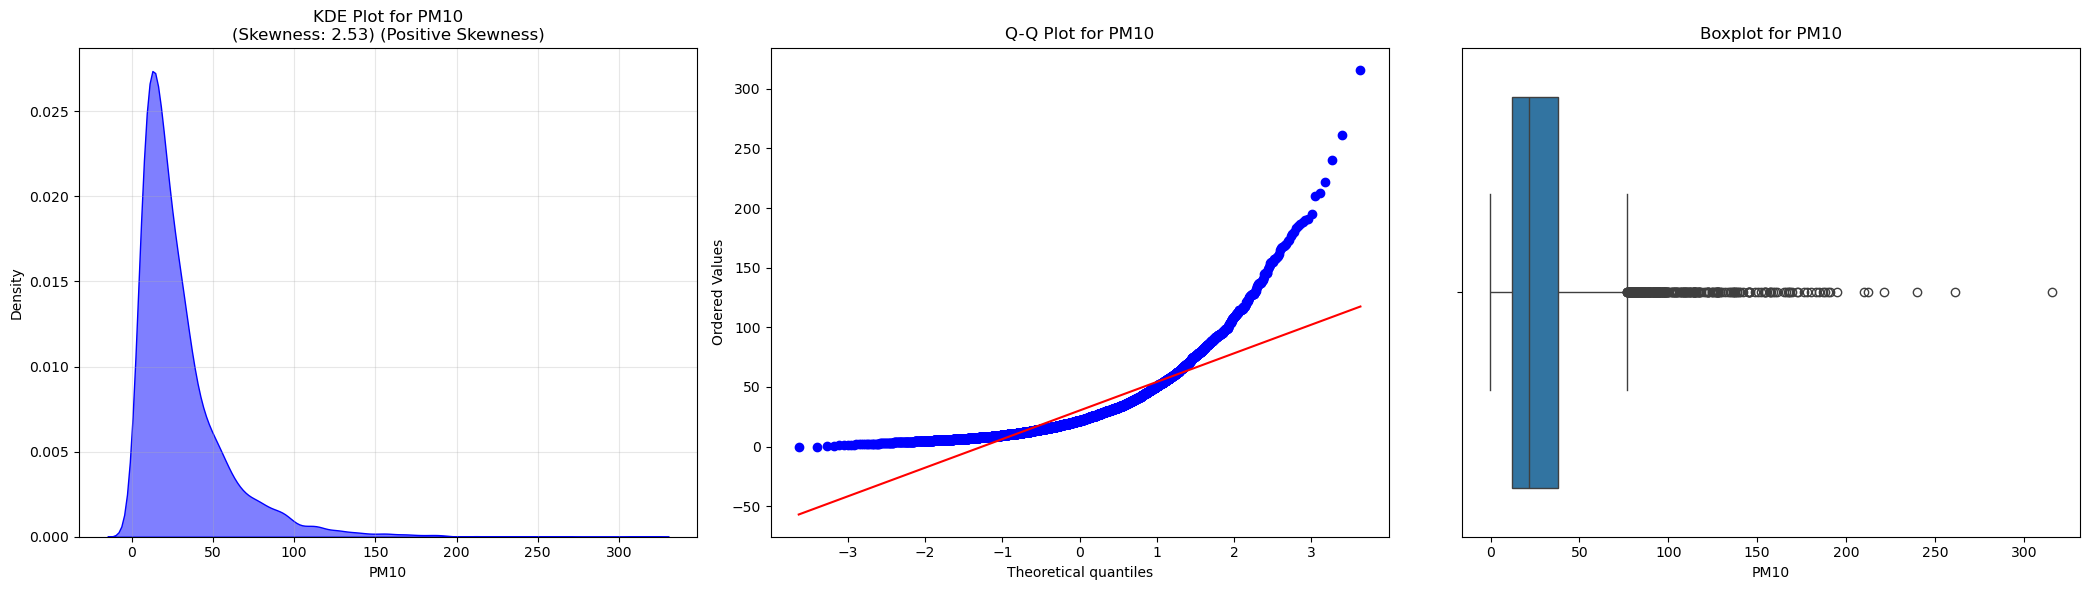

NO2: Skewness = 0.64 (Positive Skewness)


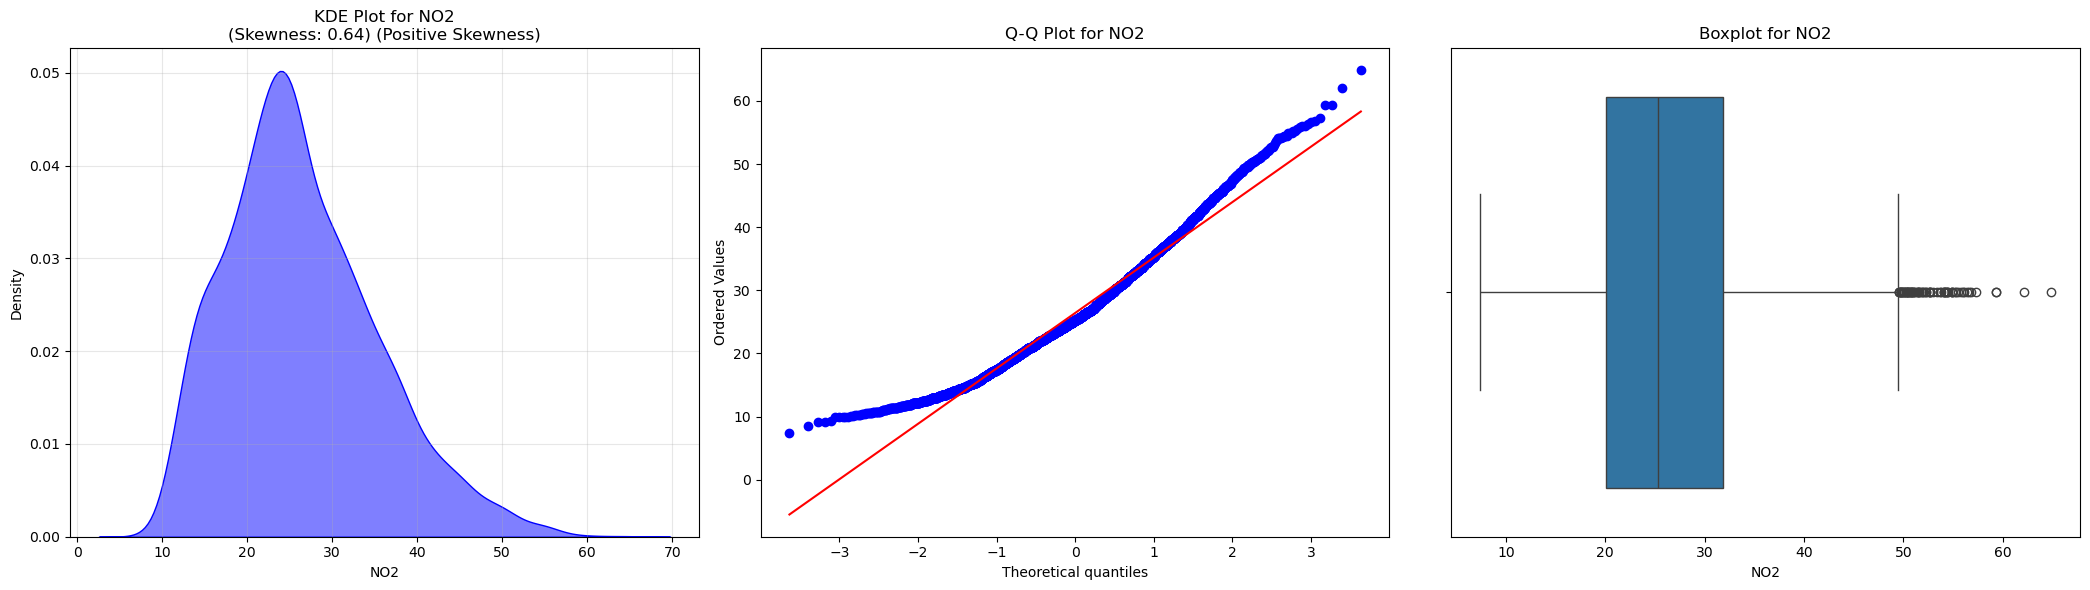

SO2: Skewness = 1.17 (Positive Skewness)


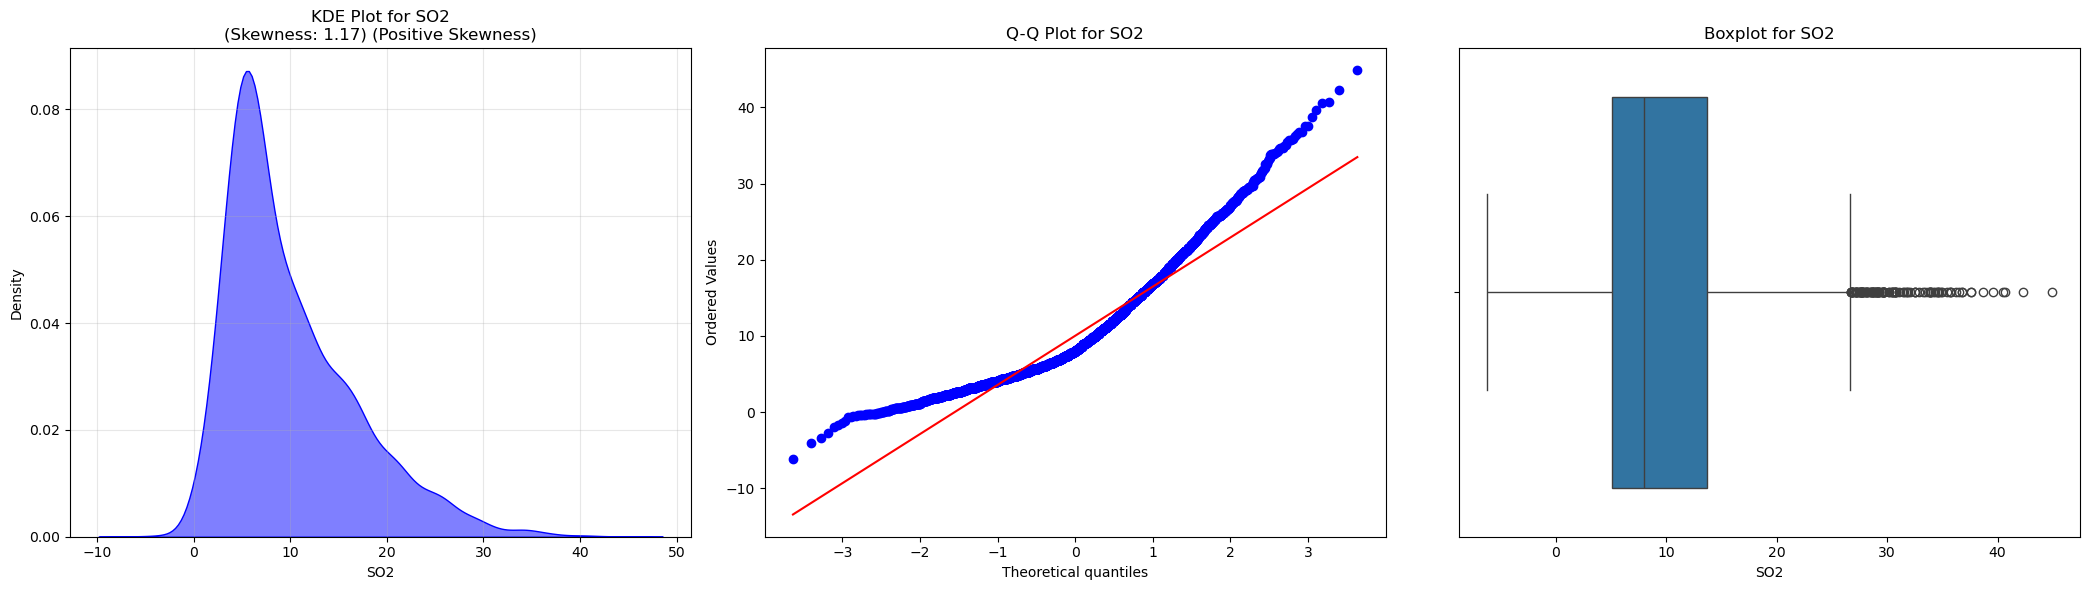

CO: Skewness = 0.88 (Positive Skewness)


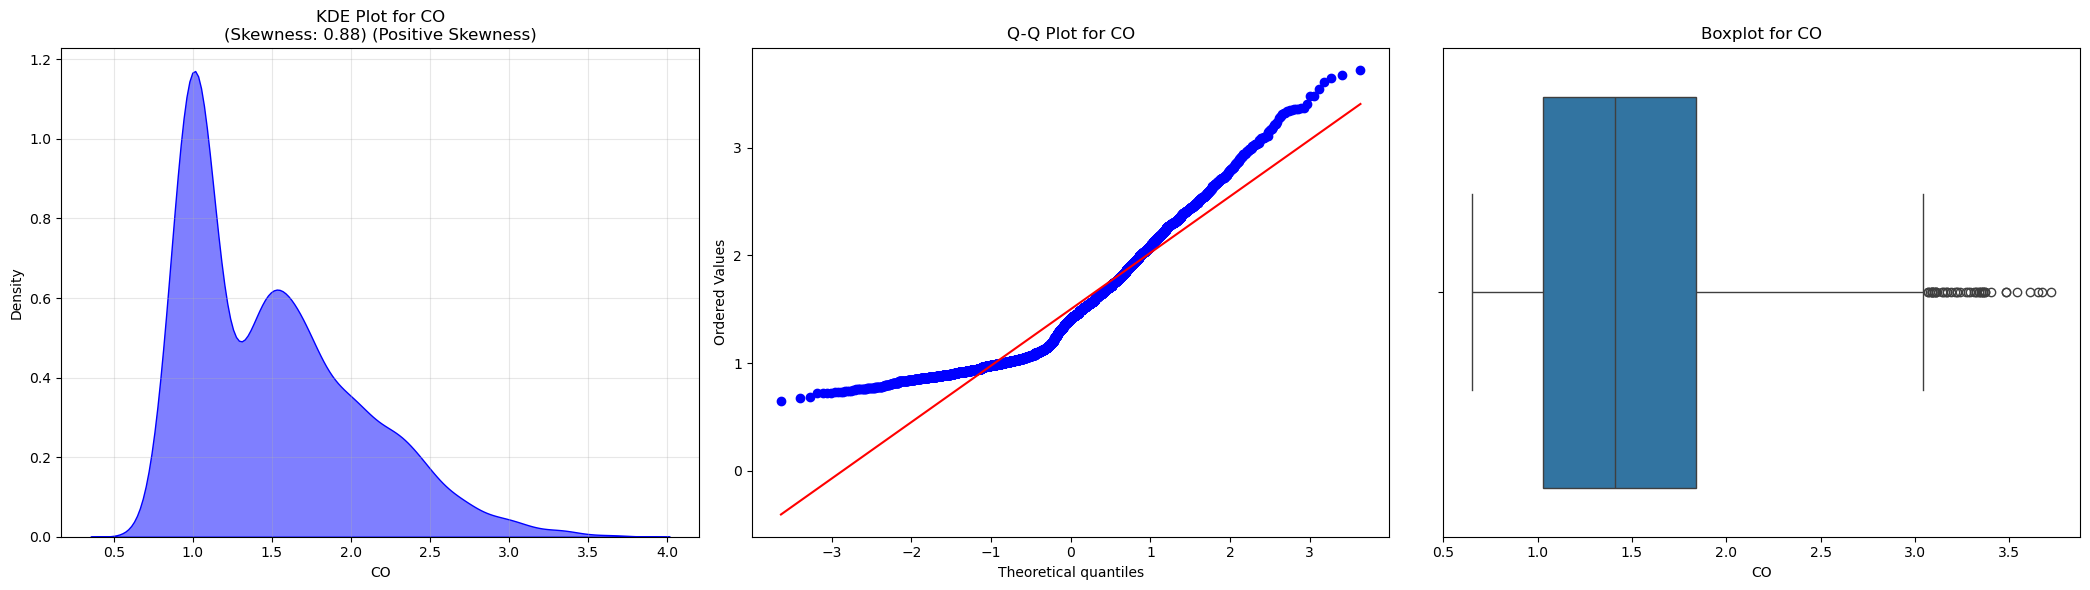

Proximity_to_Industrial_Areas: Skewness = 0.47 (Positive Skewness)


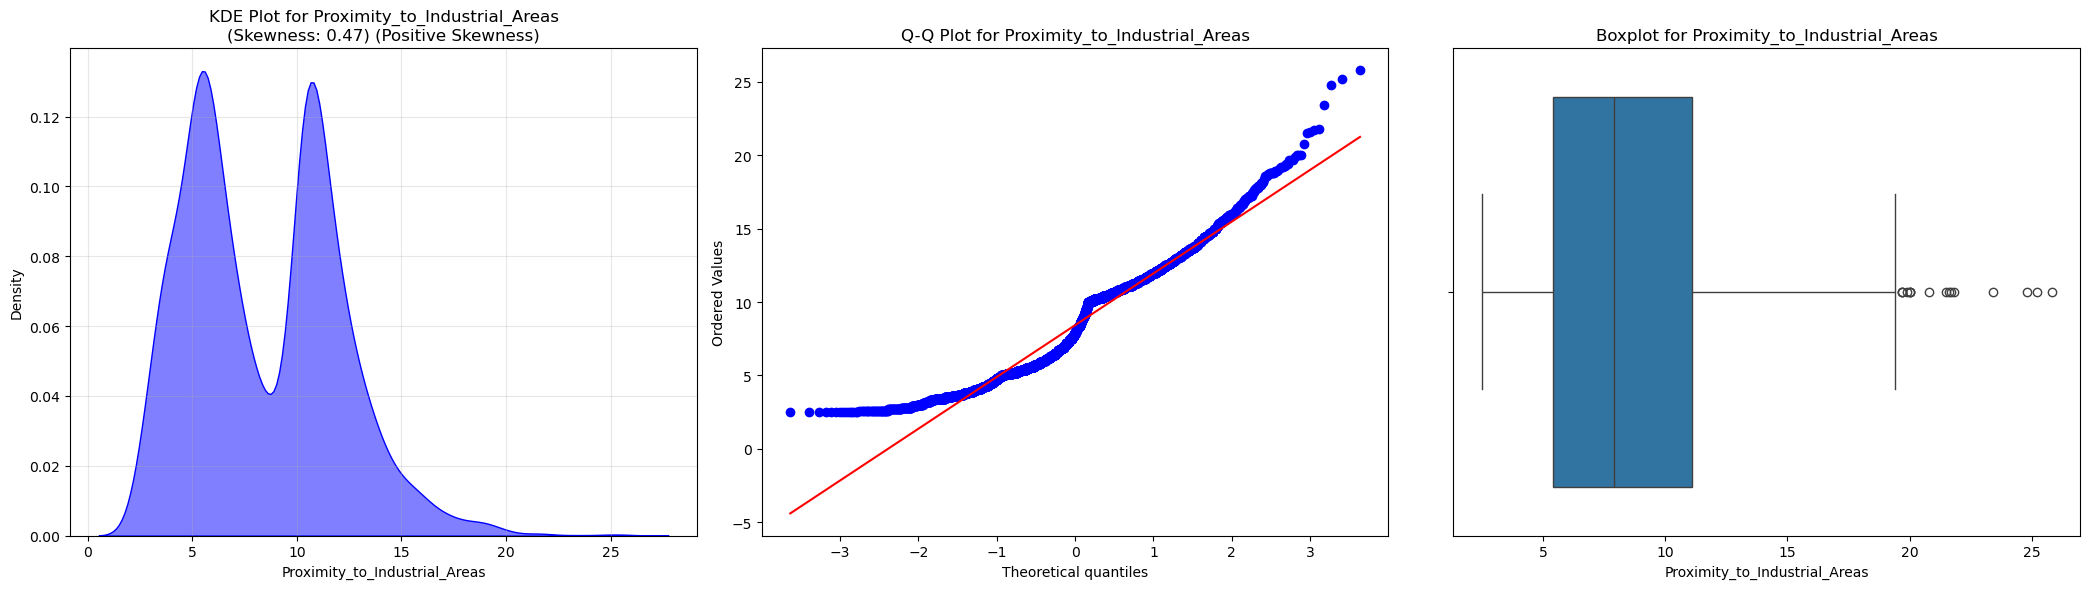

Population_Density: Skewness = 0.20 (Positive Skewness)


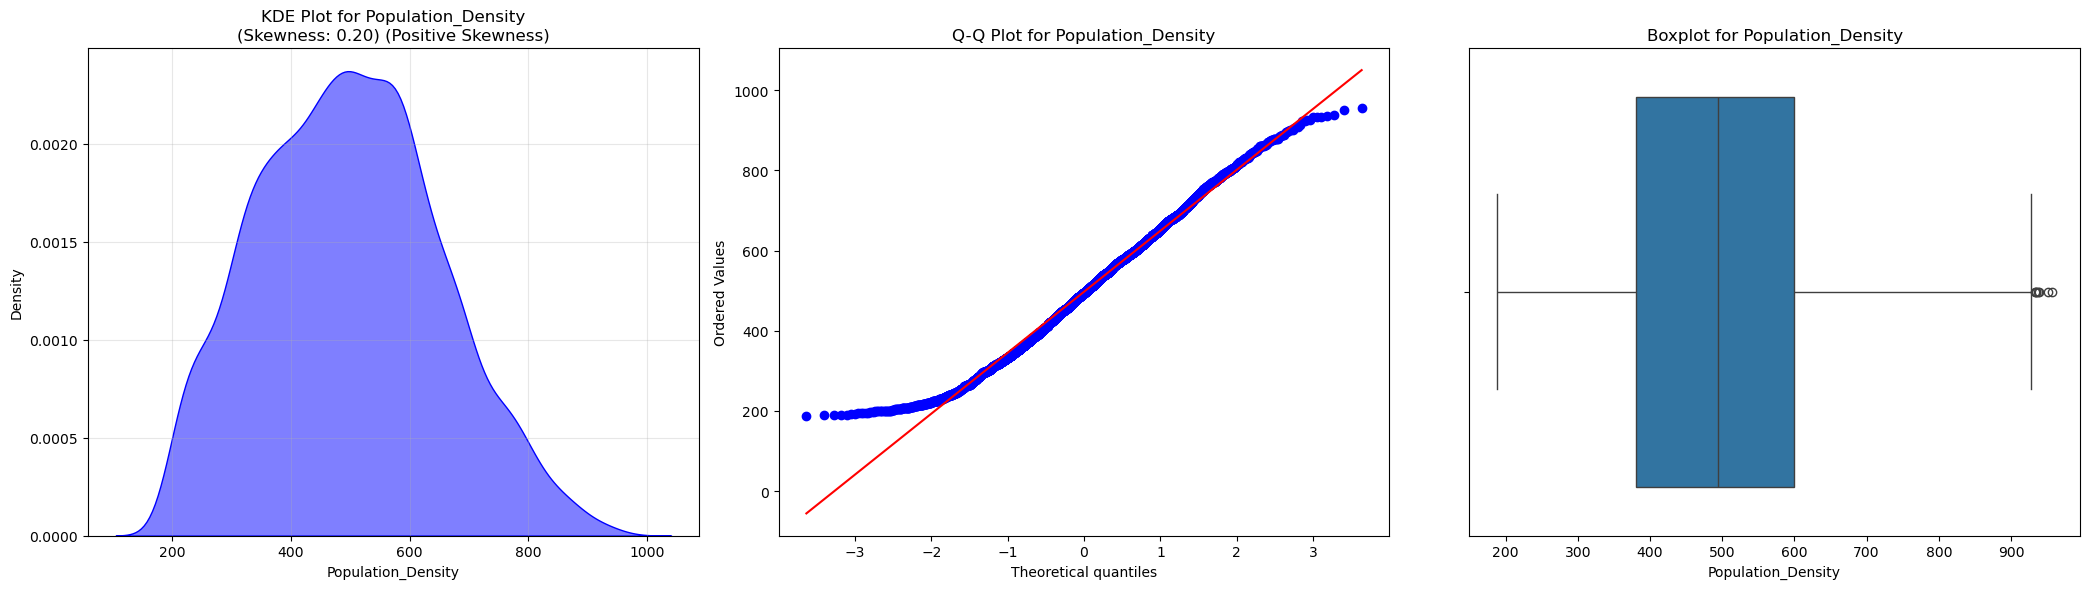

In [10]:
All_plot(X)

In [16]:
# Applying Box-Cox Transform
pt = PowerTransformer(standardize=False)
X_tr = pt.fit_transform(X)
X_trd = pd.DataFrame(X_tr,index=X.index,columns=X.columns)
pd.DataFrame({'cols':X.columns,'box_cox_lambdas':pt.lambdas_})

cols  box_cox_lambdas
0                    Temperature        -0.324050
1                       Humidity         0.430733
2                          PM2.5         0.043470
3                           PM10        -0.034002
4                            NO2         0.202860
5                            SO2         0.434705
6                             CO        -1.344910
7  Proximity_to_Industrial_Areas         0.269165
8             Population_Density         0.641984

In [18]:
X_trd.head()

Temperature   Humidity     PM2.5      PM10       NO2       SO2        CO  \
0     2.069641  11.230647  1.898856  2.797068  4.113002  4.012781  0.549968   
1     2.053064  12.723359  1.225448  2.470271  5.015063  4.145492  0.542038   
2     1.985557  12.646962  3.573179  3.343772  4.571906  4.853780  0.541007   
3     2.038972   9.063016  2.046023  1.922181  3.550549  2.819740  0.477957   
4     2.031624  12.301006  2.162557  2.701023  4.374282  2.924336  0.452784   

   Proximity_to_Industrial_Areas  Population_Density  
0                       2.628726           61.645973  
1                       2.557473           94.277684  
2                       2.355880           95.080059  
3                       3.553046           88.134998  
4                       3.800113           59.598604

Temperature: Skewness = 0.00 (Positive Skewness)


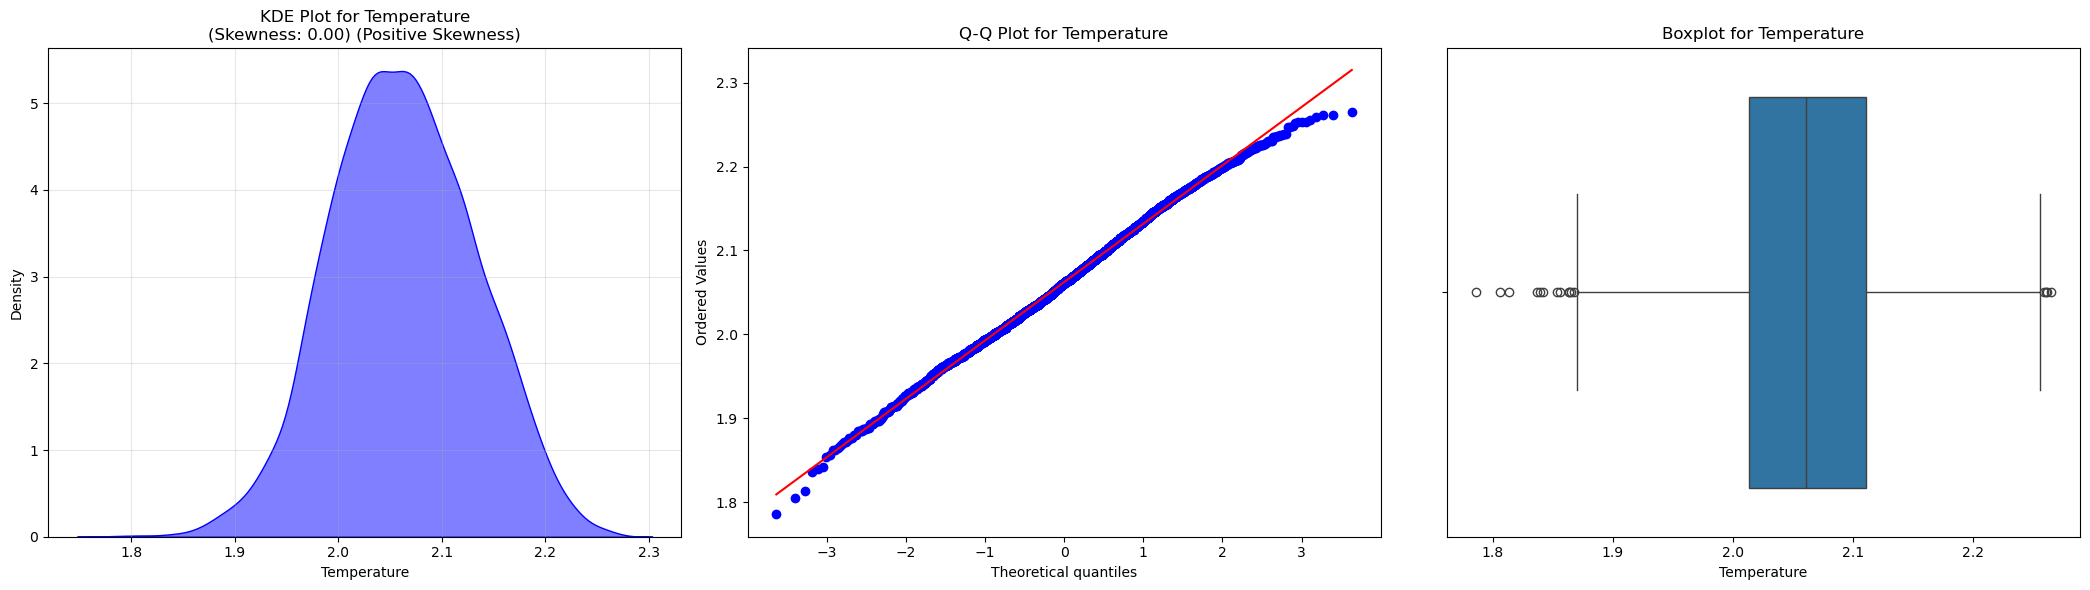

Humidity: Skewness = -0.02 (Negative Skewness)


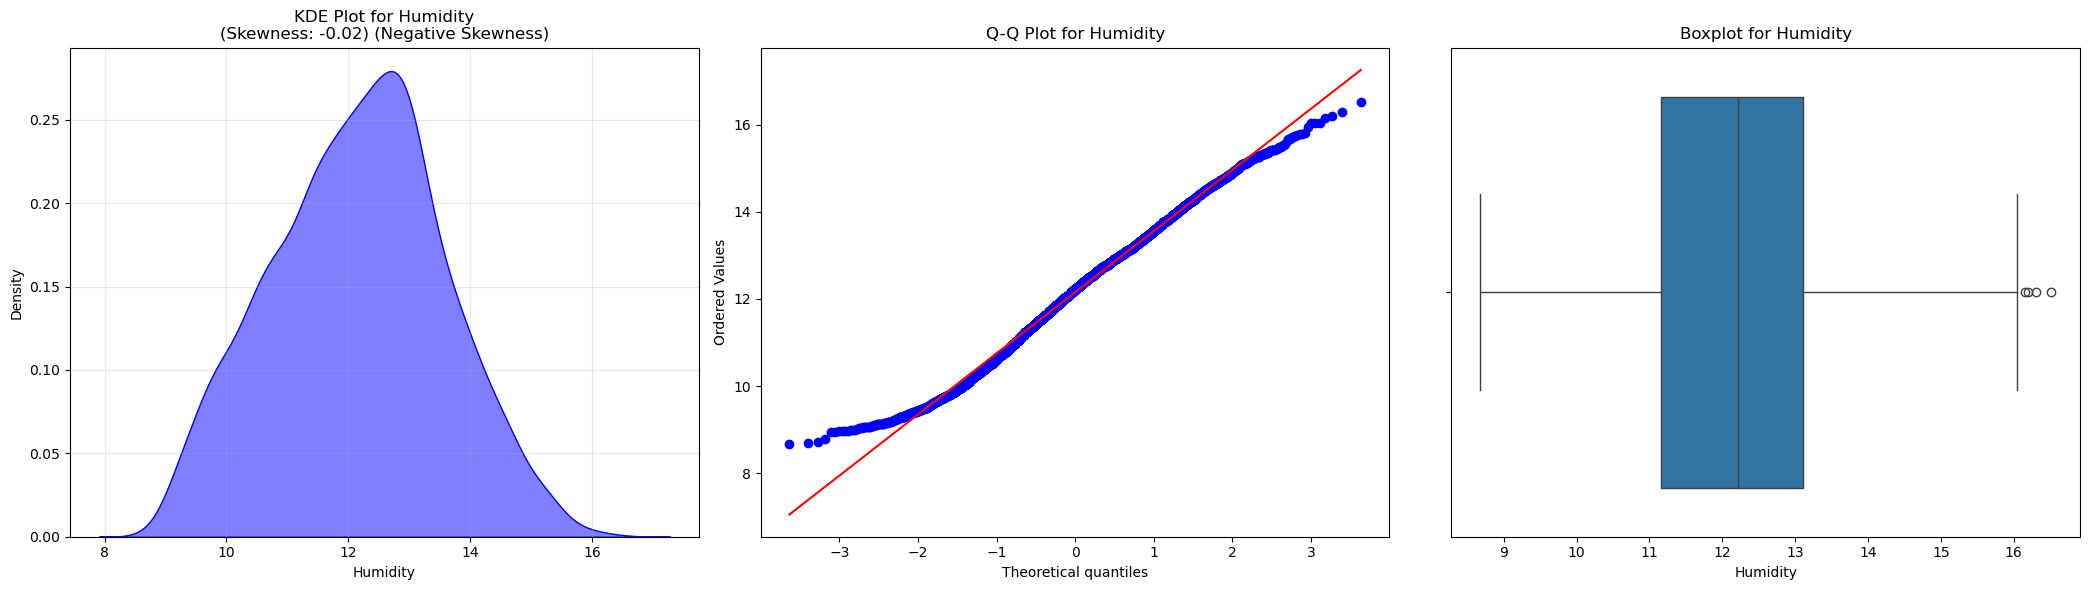

PM2.5: Skewness = -0.01 (Negative Skewness)


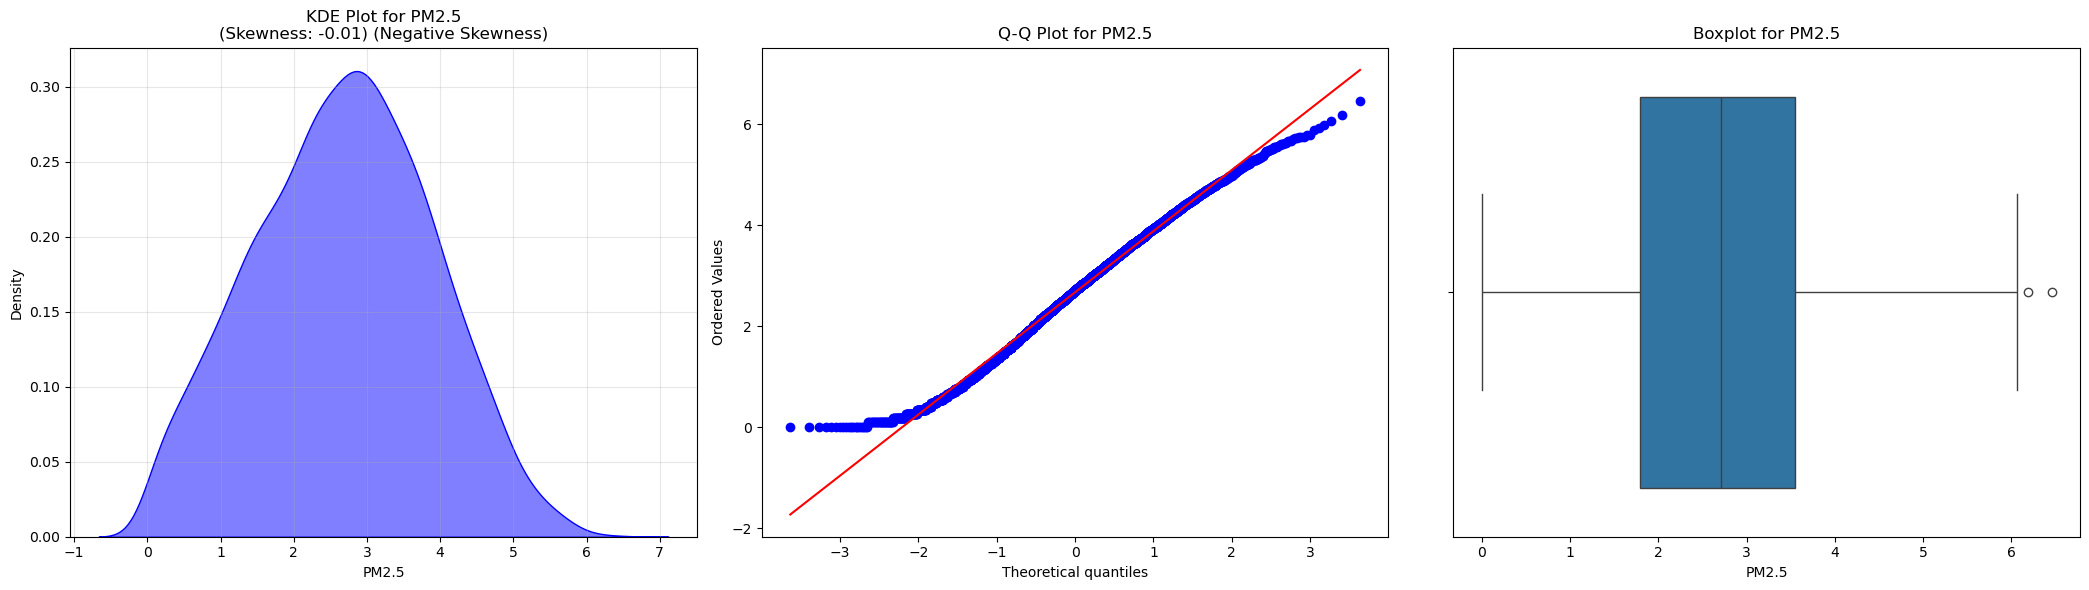

PM10: Skewness = 0.00 (Positive Skewness)


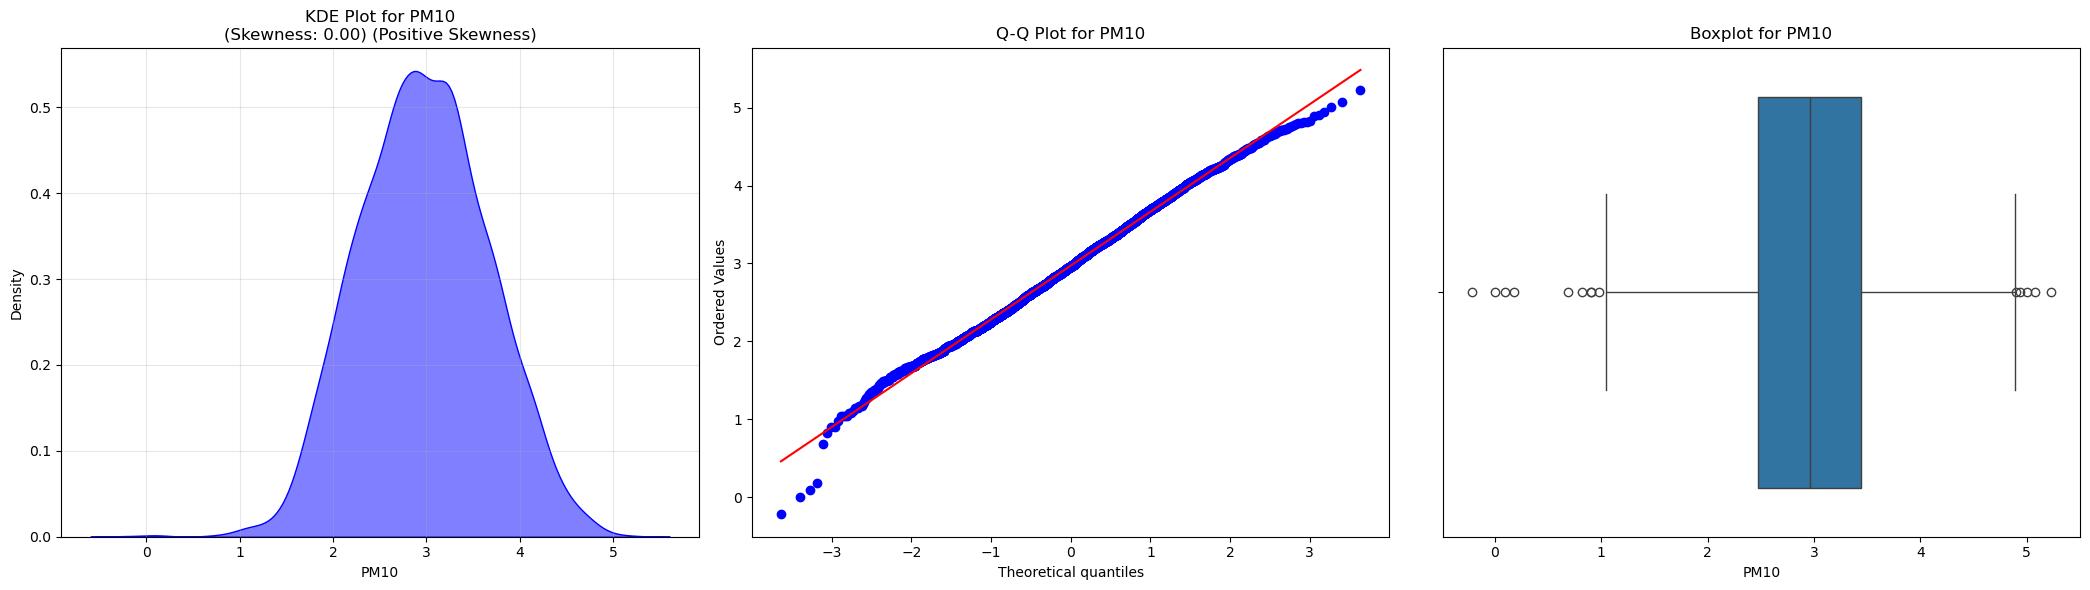

NO2: Skewness = -0.01 (Negative Skewness)


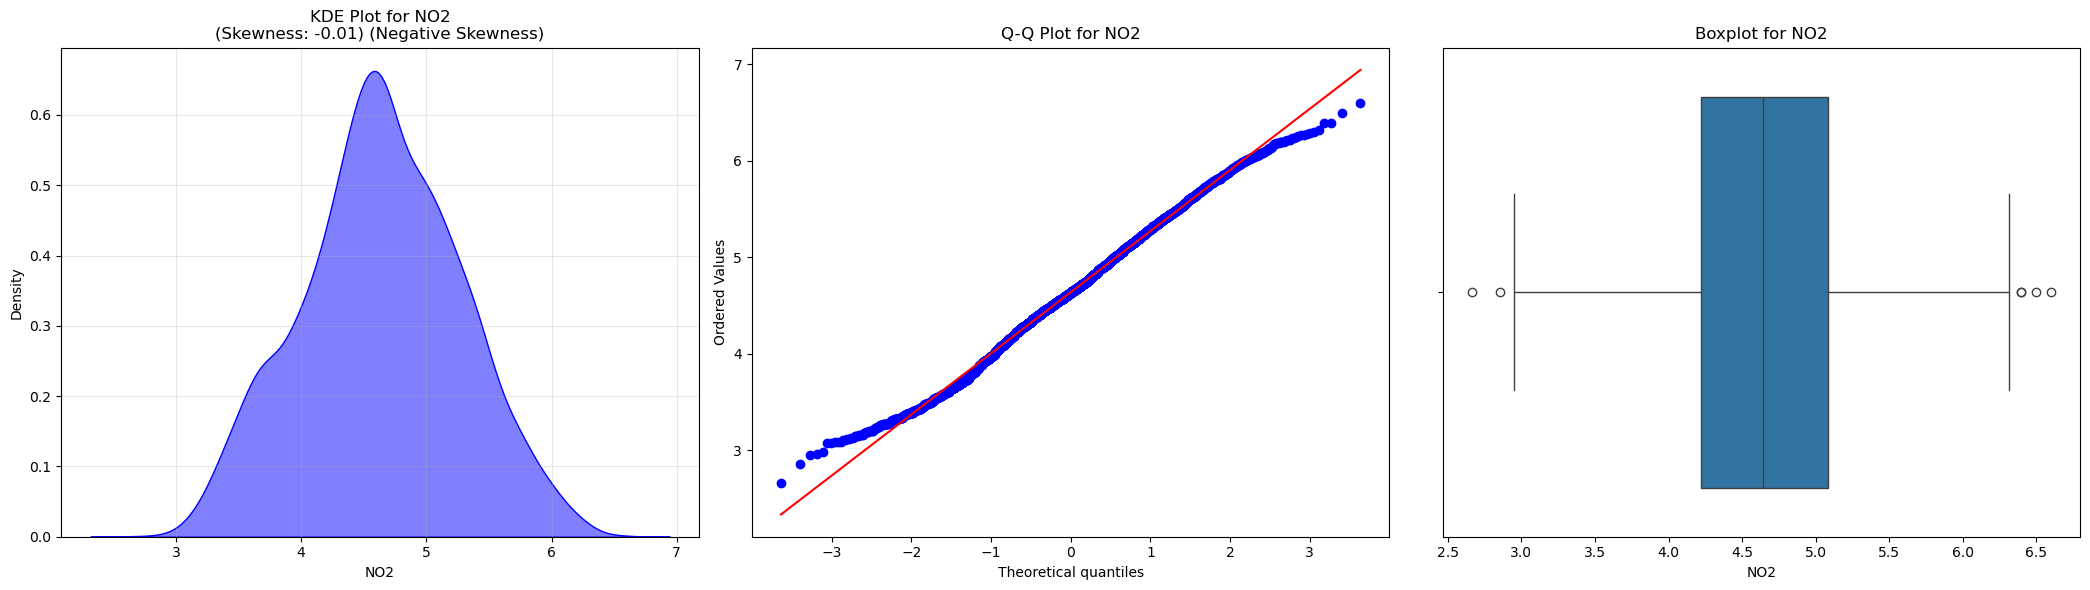

SO2: Skewness = 0.00 (Positive Skewness)


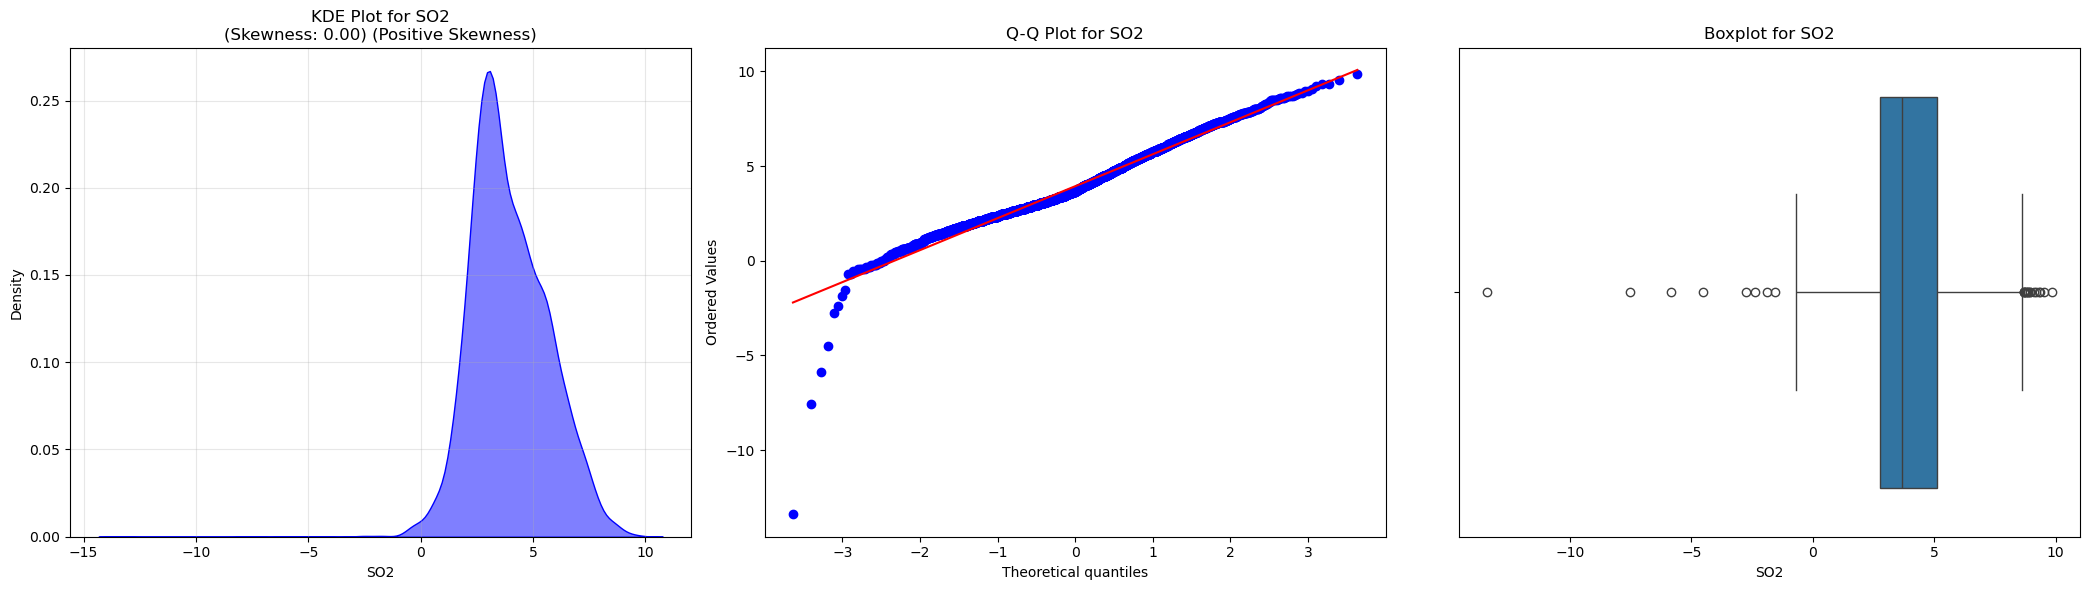

CO: Skewness = 0.11 (Positive Skewness)


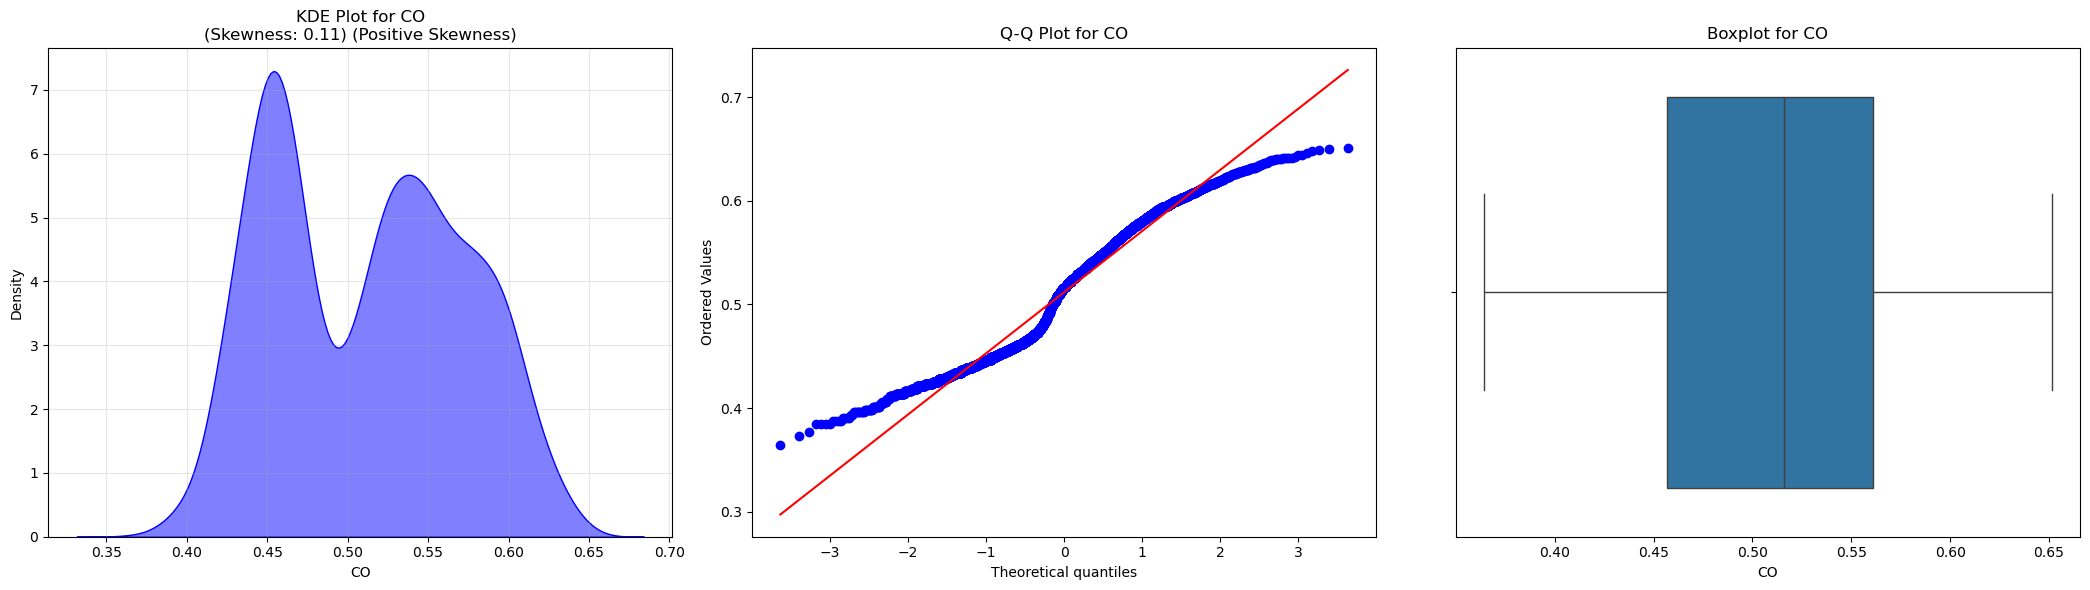

Proximity_to_Industrial_Areas: Skewness = -0.03 (Negative Skewness)


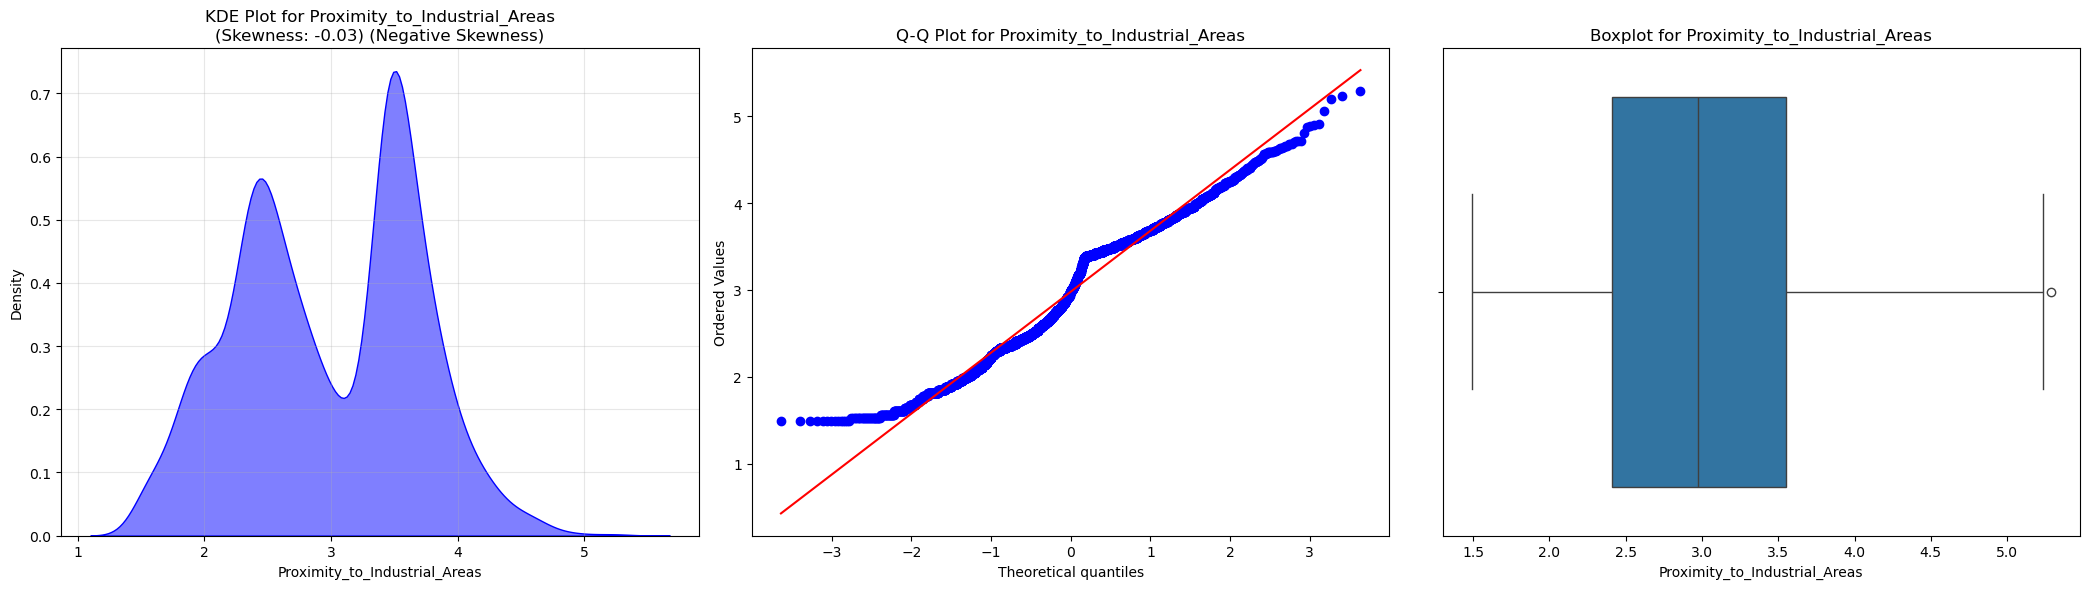

Population_Density: Skewness = -0.04 (Negative Skewness)


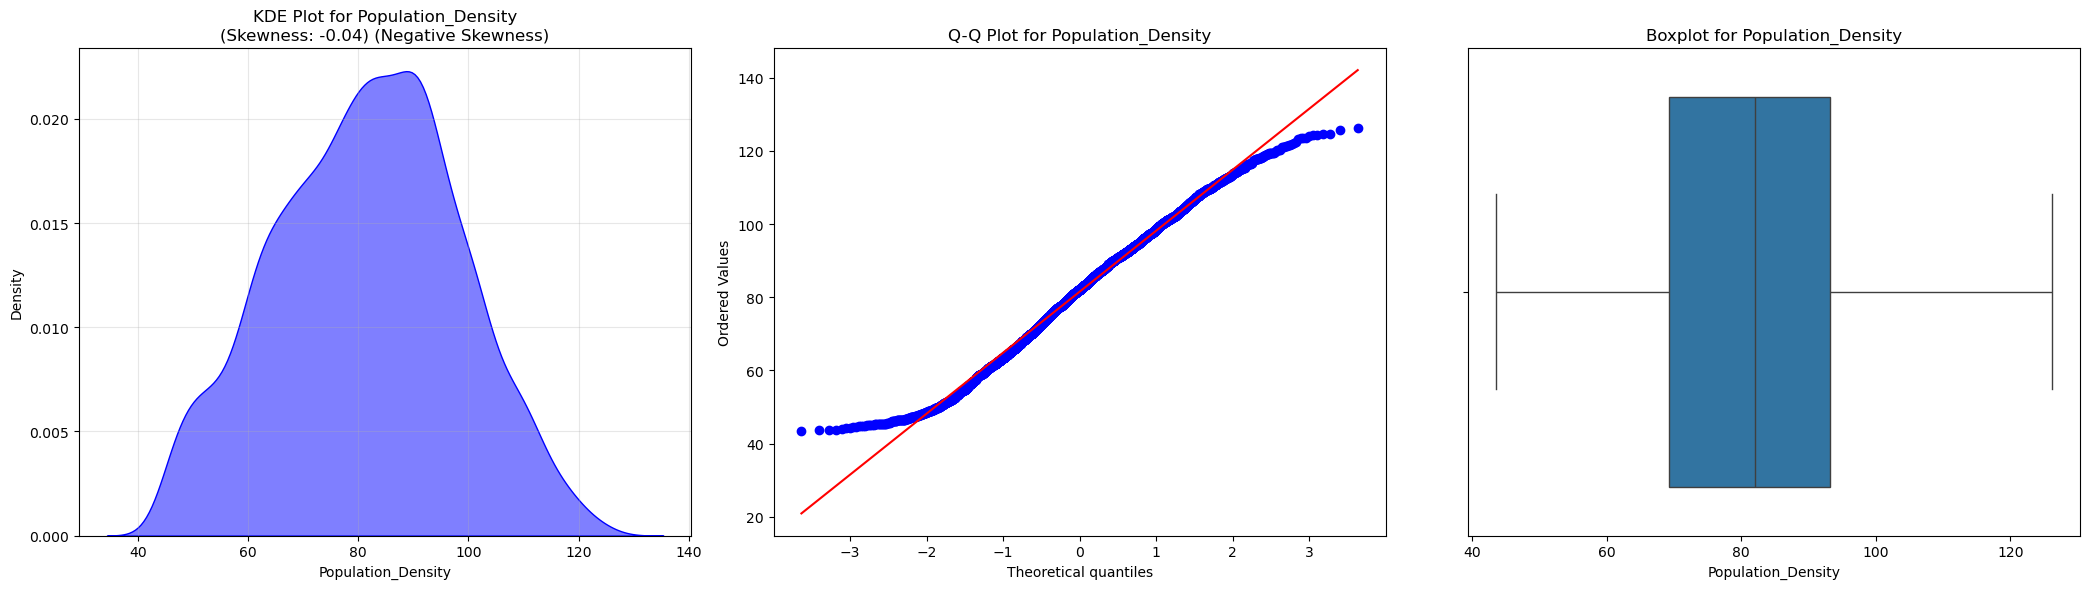

In [20]:
All_plot(X_trd)

In [22]:
# Function to cap outliers using IQR
def cap_outliers_iqr(df):
    df_capped = df.copy()  # Make a copy to avoid modifying the original DataFrame

    # Loop through numeric columns and cap outliers based on IQR
    for column in df_capped.select_dtypes(include=[np.number]).columns:
        Q1 = df_capped[column].quantile(0.25)
        Q3 = df_capped[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values outside the bounds to the lower or upper bound
        df_capped[column] = np.clip(df_capped[column], lower_bound, upper_bound)

    return df_capped

In [24]:
X_new = cap_outliers_iqr(X_trd)

In [26]:
X_new.head()

Temperature   Humidity     PM2.5      PM10       NO2       SO2        CO  \
0     2.069641  11.230647  1.898856  2.797068  4.113002  4.012781  0.549968   
1     2.053064  12.723359  1.225448  2.470271  5.015063  4.145492  0.542038   
2     1.985557  12.646962  3.573179  3.343772  4.571906  4.853780  0.541007   
3     2.038972   9.063016  2.046023  1.922181  3.550549  2.819740  0.477957   
4     2.031624  12.301006  2.162557  2.701023  4.374282  2.924336  0.452784   

   Proximity_to_Industrial_Areas  Population_Density  
0                       2.628726           61.645973  
1                       2.557473           94.277684  
2                       2.355880           95.080059  
3                       3.553046           88.134998  
4                       3.800113           59.598604

Temperature: Skewness = 0.03 (Positive Skewness)


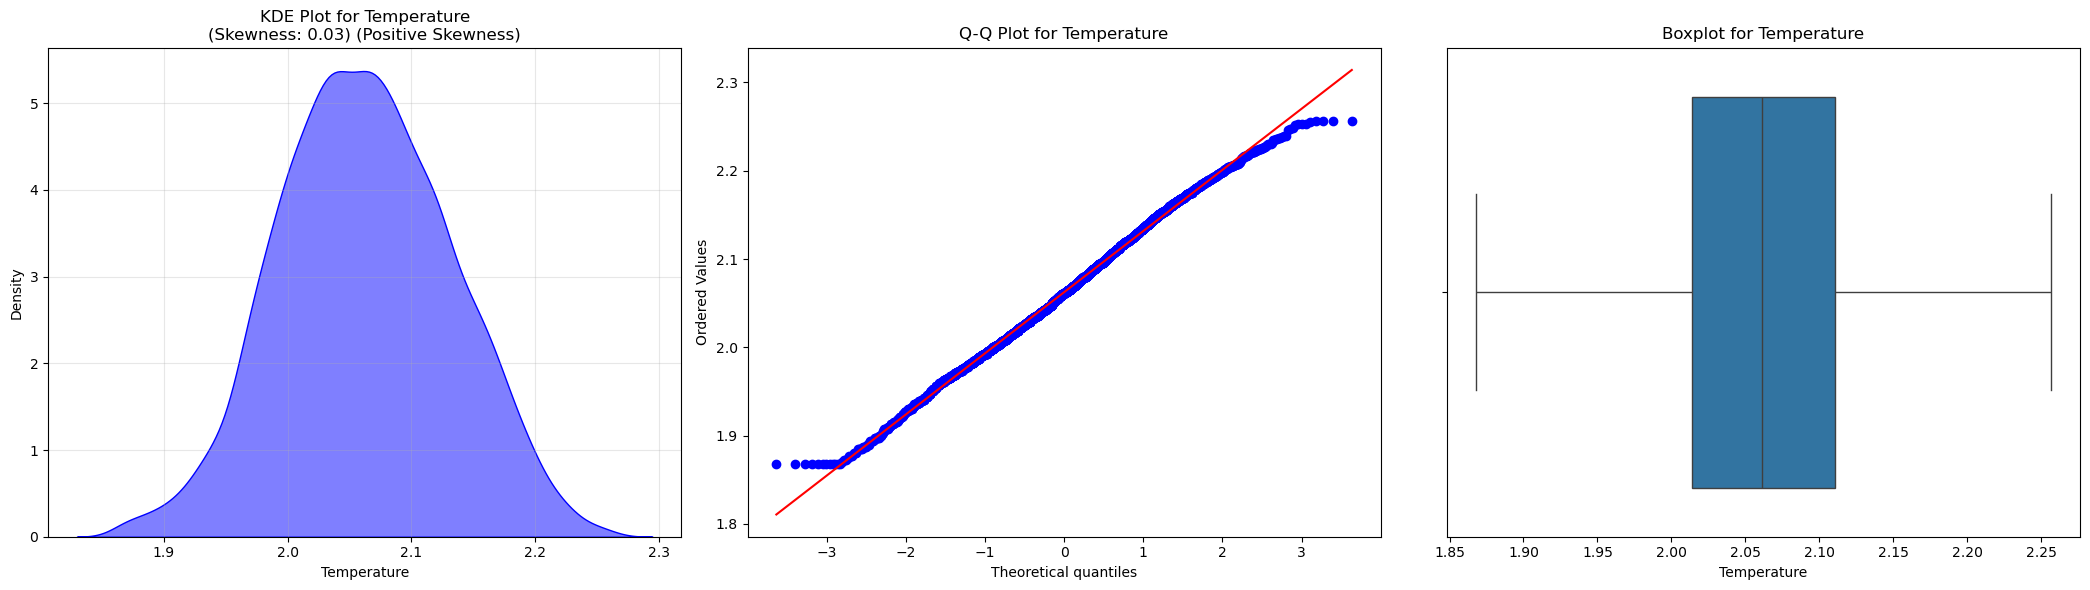

Humidity: Skewness = -0.02 (Negative Skewness)


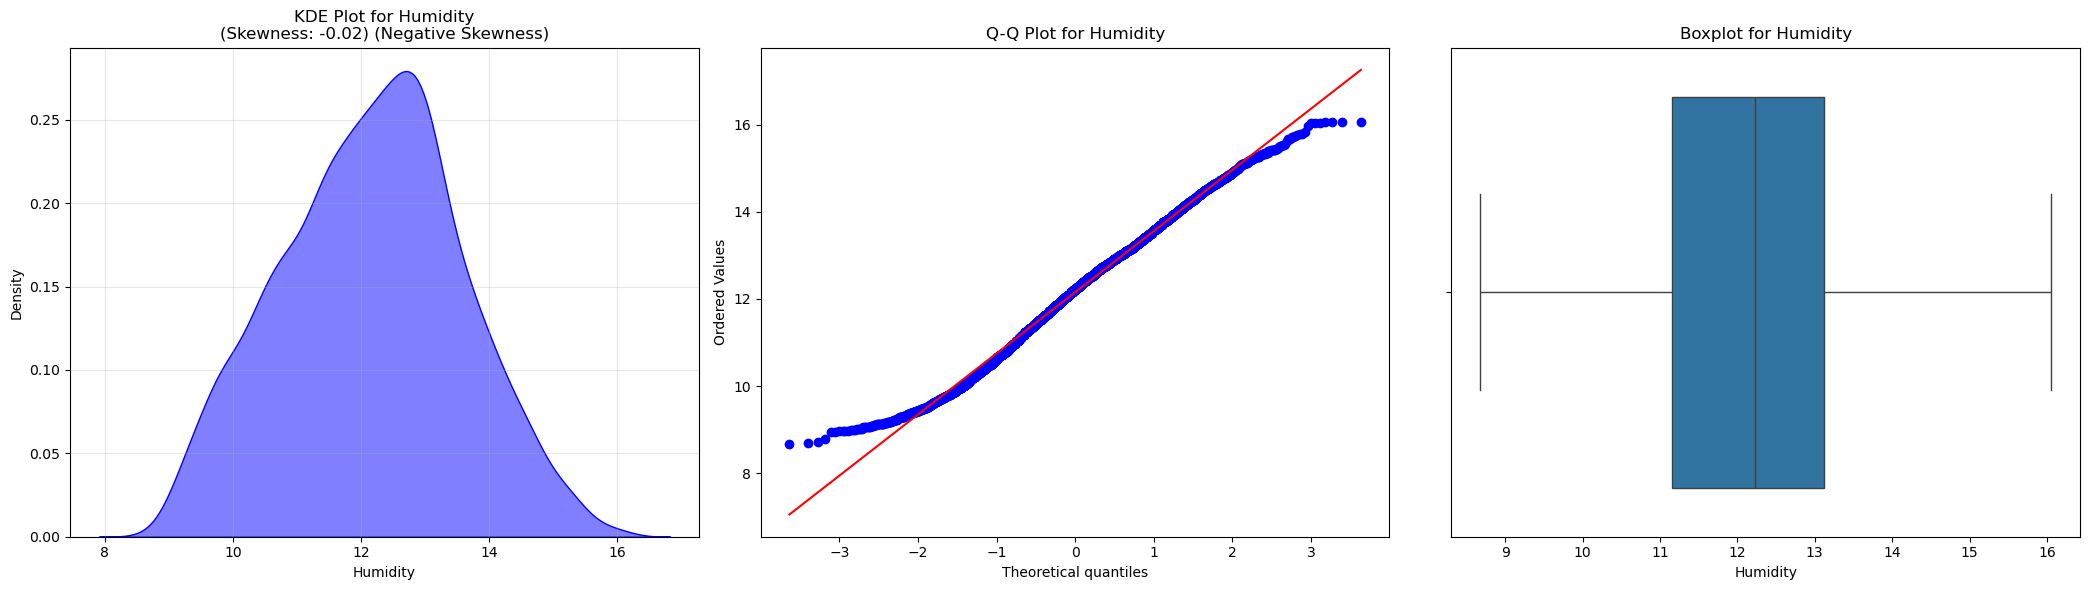

PM2.5: Skewness = -0.01 (Negative Skewness)


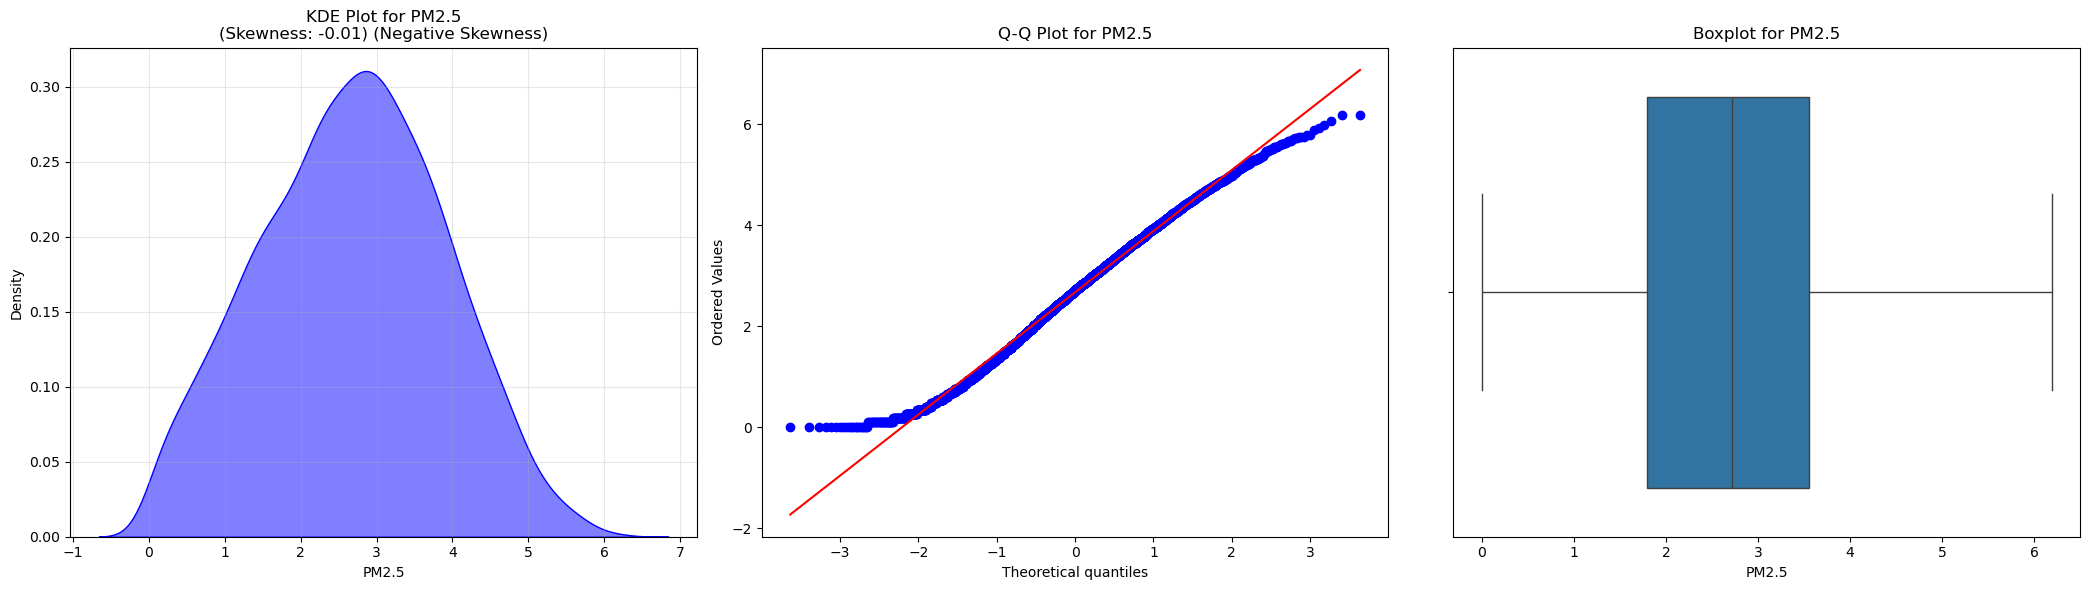

PM10: Skewness = 0.05 (Positive Skewness)


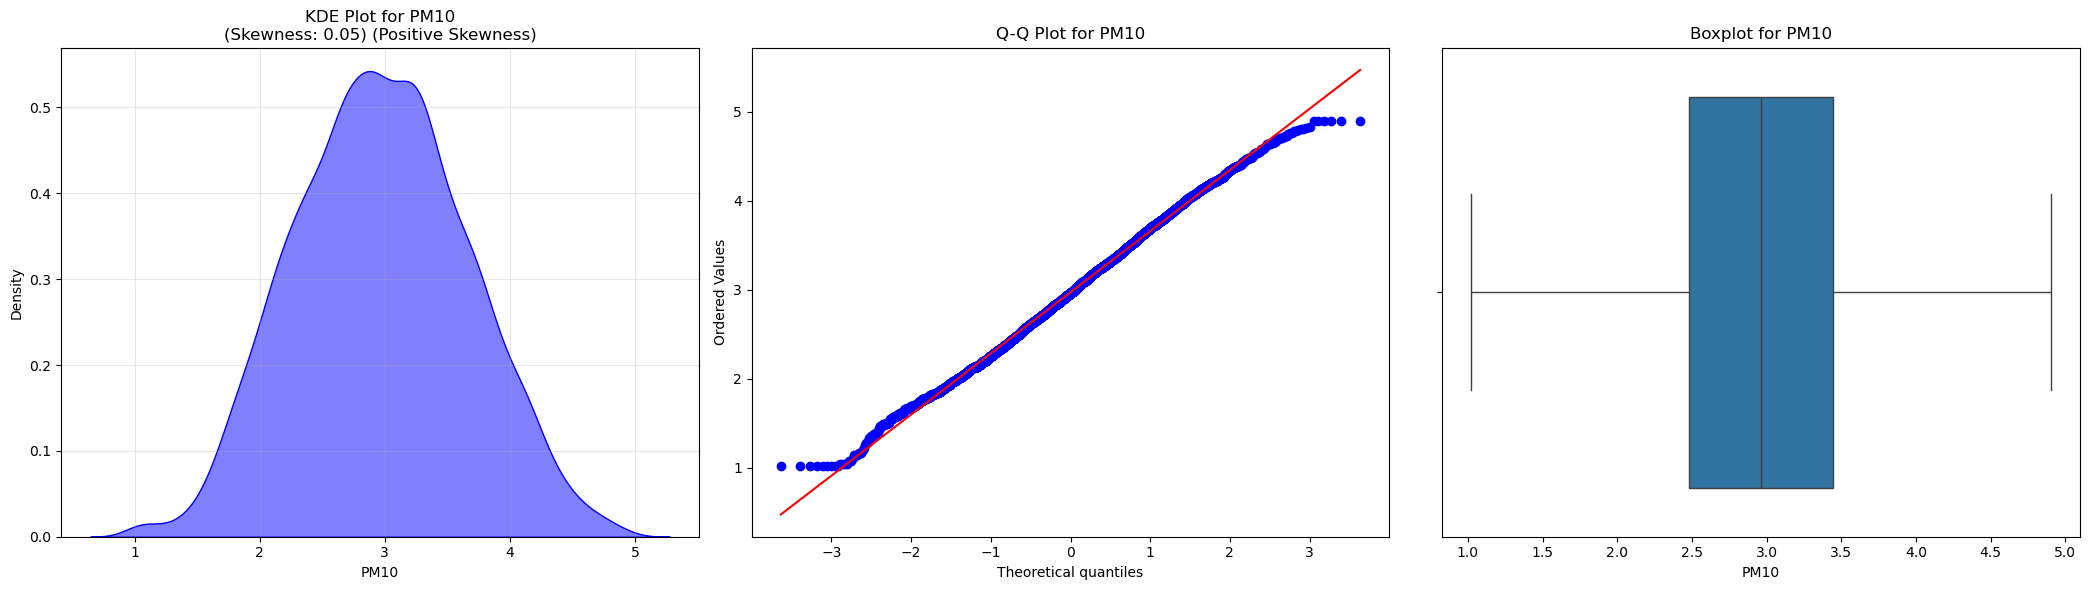

NO2: Skewness = -0.01 (Negative Skewness)


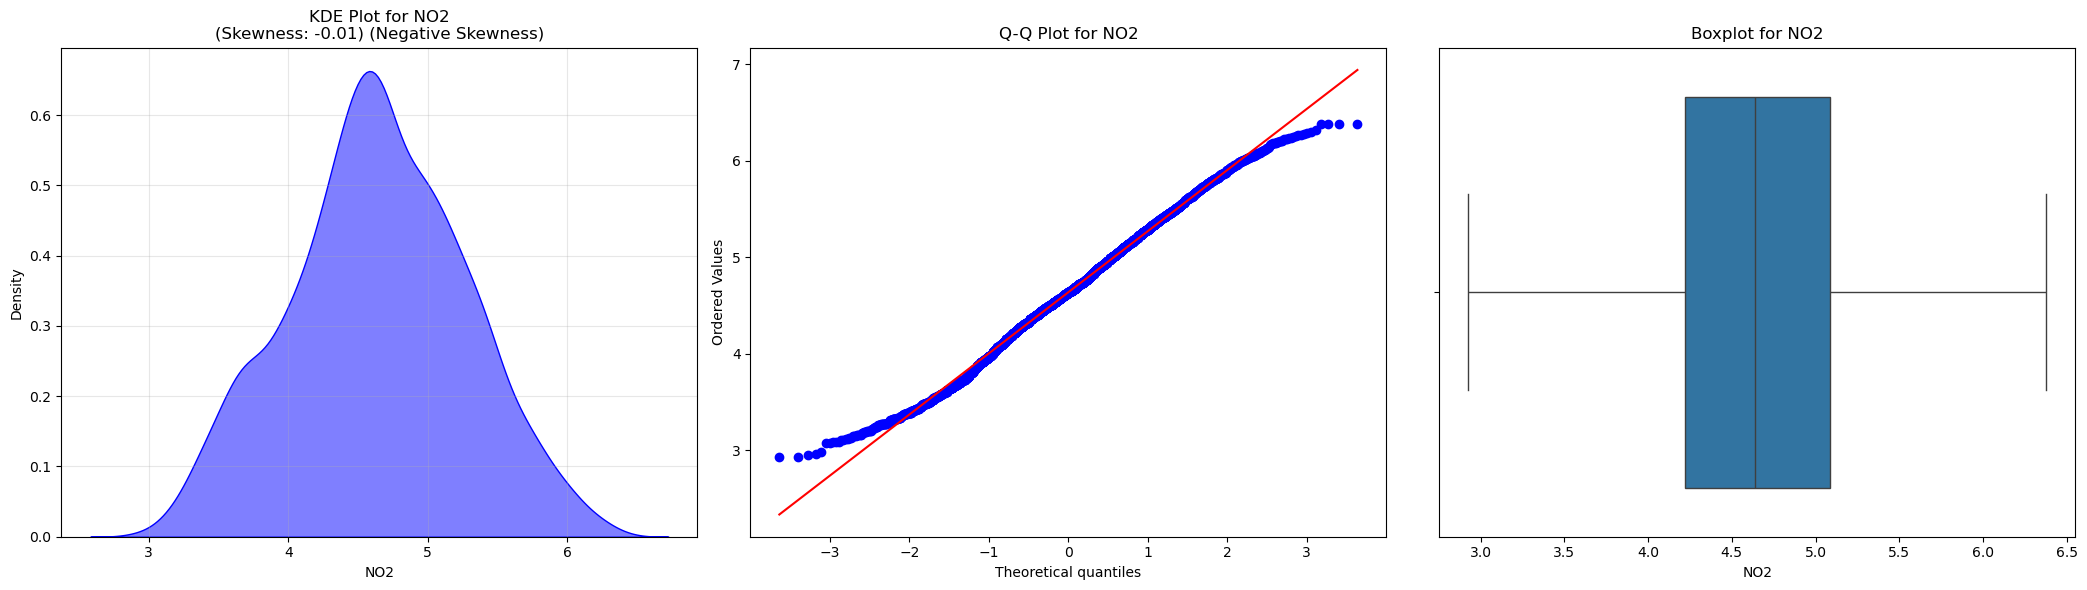

SO2: Skewness = 0.33 (Positive Skewness)


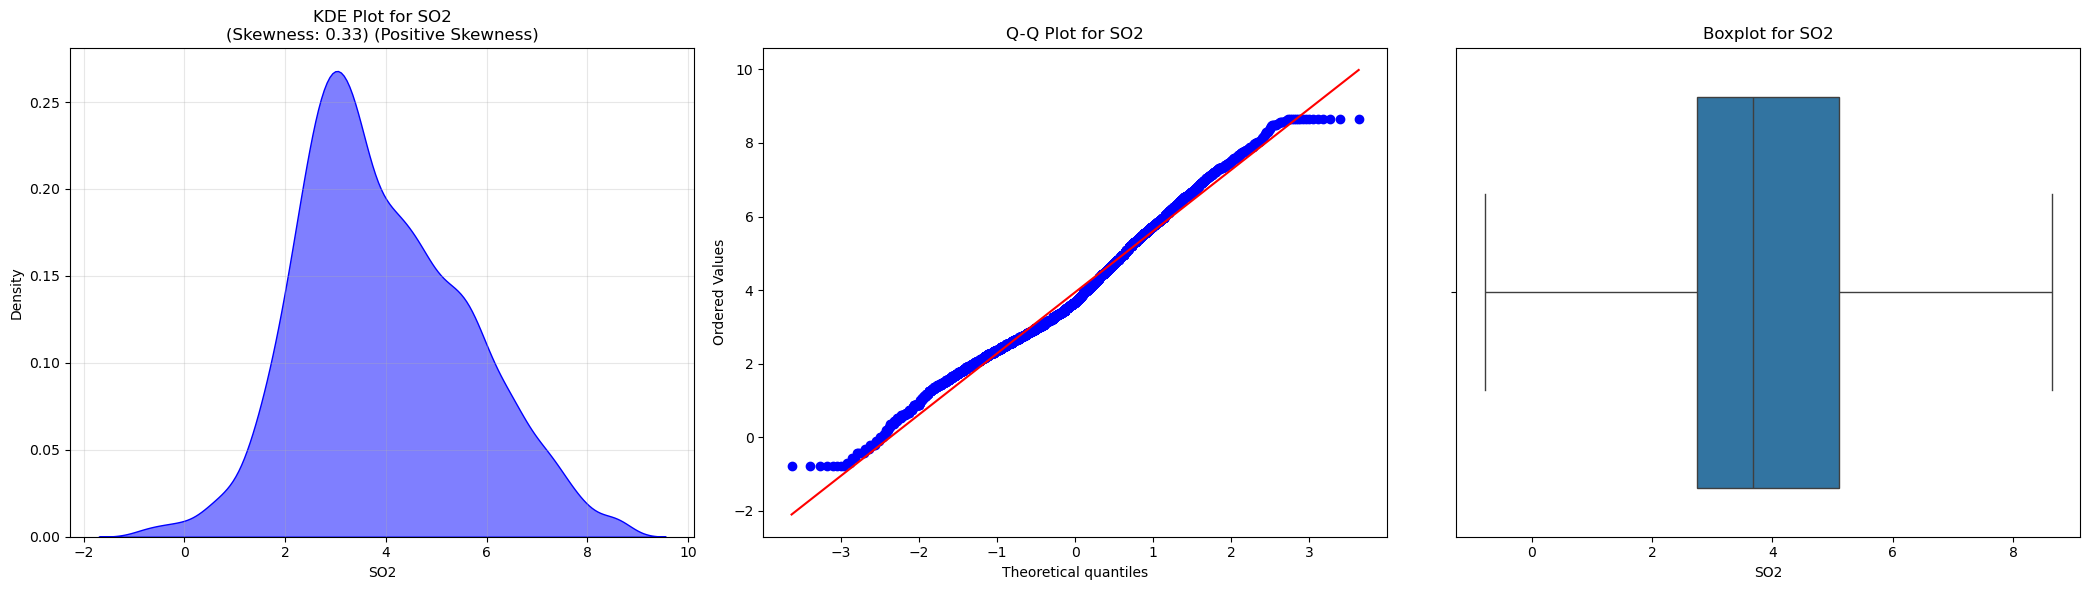

CO: Skewness = 0.11 (Positive Skewness)


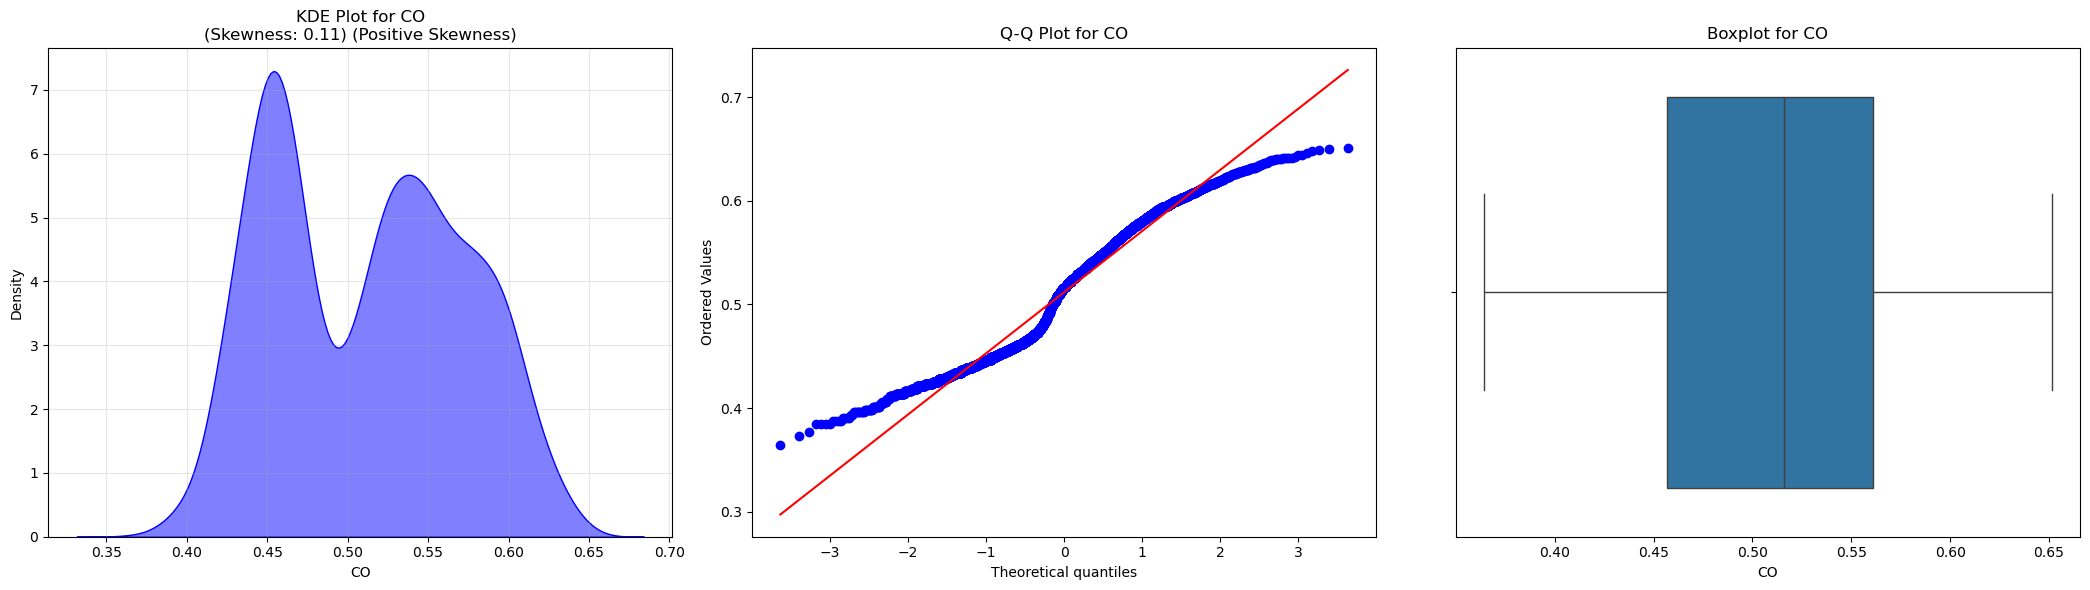

Proximity_to_Industrial_Areas: Skewness = -0.03 (Negative Skewness)


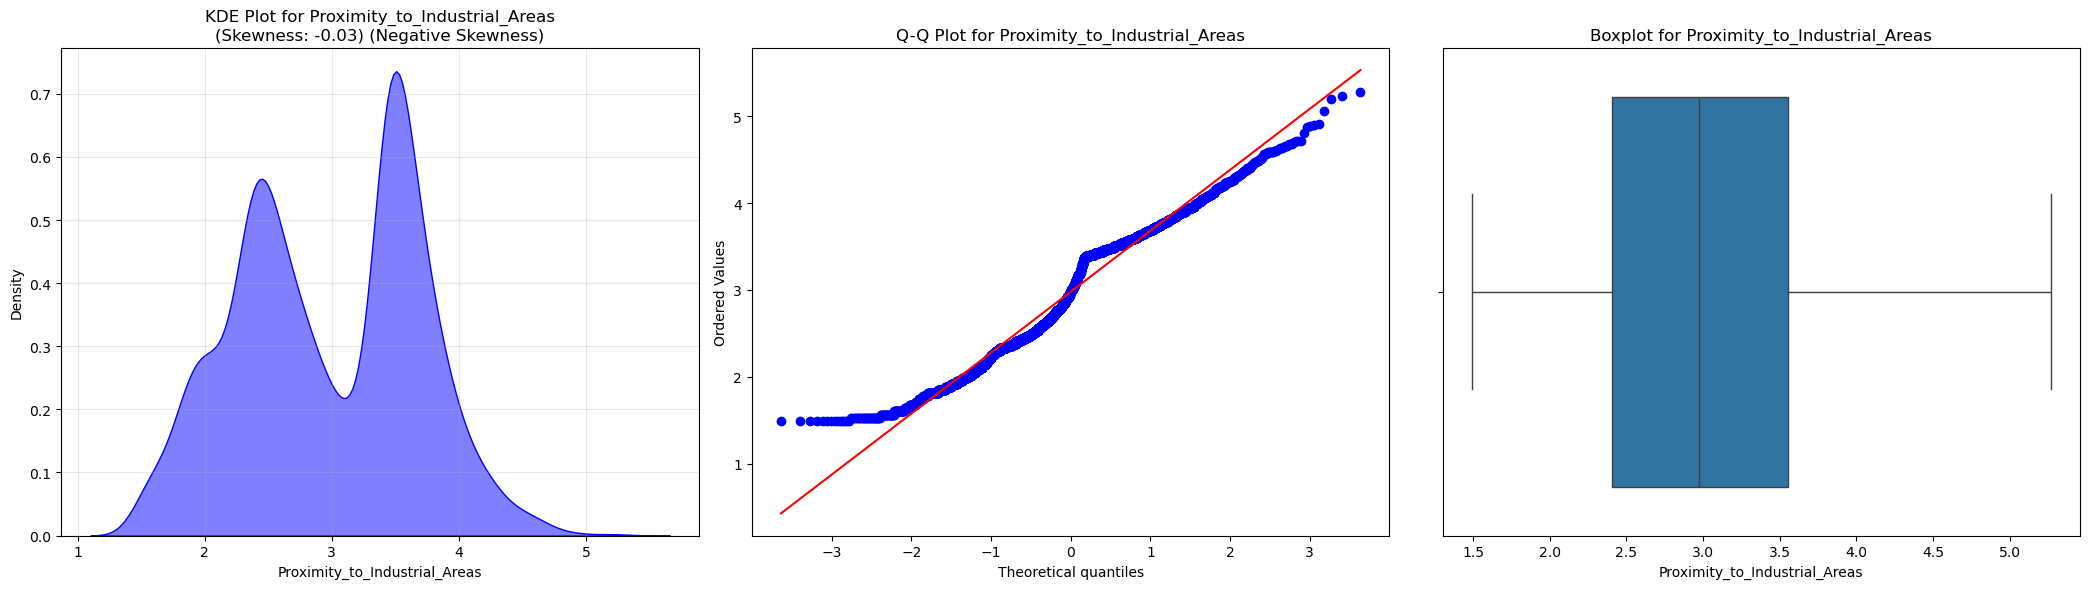

Population_Density: Skewness = -0.04 (Negative Skewness)


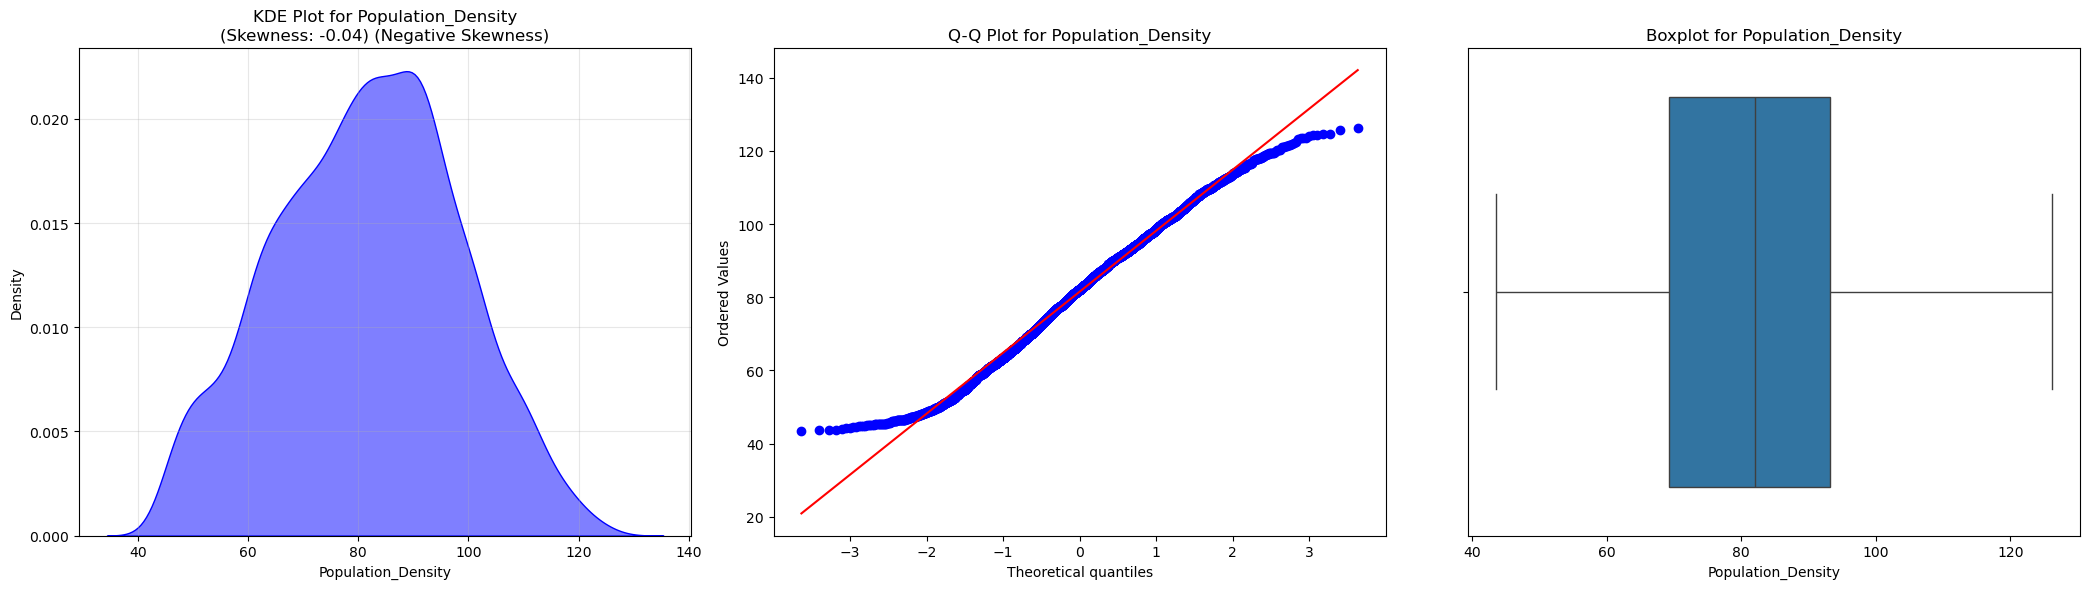

In [28]:
All_plot(X_new)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y, test_size=0.2,random_state=42)

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4000, 9), (1000, 9), (4000,), (1000,))

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)